# **Práctica 1 - Análisis Exploratorio**
**Estudiante:** Kelly Paltin

# **Importacion de Librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle


print("Módulos y clases importados")

Módulos y clases importados


# **Actividades:**

# **Carga de Datos**

In [ ]:
nombresVariables=['EDAD','CLASETRABAJO','PESOFINAL','EDUCACION','NUMEDUCACION',
                  'ESTADOMATRIMONIAL','OCUPACION','RELACION','RAZA','SEXO','GANANCIACAPITAL',
                  'PERDIDACAPITAL','HORASPORSEMANA','PAISNATIVO','INGRESO']

#Cargar un dataframe de un archivo local
dataset = "/content/adult.data"
dfOriginal = pd.read_csv(dataset, sep = ',', names=nombresVariables,  na_values=' ?' )

dataframe=copy.deepcopy(dfOriginal)
print('cantidad de observaciones (personas): ',dataframe.shape[0])
print('cantidad de variables: ',dataframe.shape[1])
print(dataframe.shape)

cantidad de observaciones (personas):  32561
cantidad de variables:  15
(32561, 15)


**Nombre del dataset:** Census Income. Enlace: https://archive.ics.uci.edu/dataset/20/census+income [1]

**Descripción General:** El conjunto de datos "Census Income" contiene los datos de cada persona censada en Estados Unidos del año 1994, contiene 32561 registros de personas con 14 características cada uno, utilizado para predecir si un individuo gana más de 50,000 dólares al año.

**Número de Variables (o atributos):** 15

**Número de Instancias (personas censadas):** 32561

**Salida:** INGRESO (>50K:1, <=50k:2)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EDAD               32561 non-null  int64 
 1   CLASETRABAJO       30725 non-null  object
 2   PESOFINAL          32561 non-null  int64 
 3   EDUCACION          32561 non-null  object
 4   NUMEDUCACION       32561 non-null  int64 
 5   ESTADOMATRIMONIAL  32561 non-null  object
 6   OCUPACION          30718 non-null  object
 7   RELACION           32561 non-null  object
 8   RAZA               32561 non-null  object
 9   SEXO               32561 non-null  object
 10  GANANCIACAPITAL    32561 non-null  int64 
 11  PERDIDACAPITAL     32561 non-null  int64 
 12  HORASPORSEMANA     32561 non-null  int64 
 13  PAISNATIVO         31978 non-null  object
 14  INGRESO            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
tamaño = dataframe.shape
print("Tamaño del conjunto de datos:", tamaño)

num_variables = dataframe.shape[1]
num_observaciones = dataframe.shape[0]
print("Cantidad de variables:", num_variables)
print("Cantidad de observaciones:", num_observaciones)

# Tipos de variables
tipos_variables = dataframe.dtypes
print("\nTipos de variables:")
print(tipos_variables)

# Calidad de los datos
# Valores faltantes
valores_faltantes = dataframe.isnull().sum()
print("\nValores faltantes:")
print(valores_faltantes)

# Duplicados
duplicados = dataframe.duplicated().sum()
print("\nCantidad de registros duplicados:", duplicados)


Tamaño del conjunto de datos: (32561, 15)
Cantidad de variables: 15
Cantidad de observaciones: 32561

Tipos de variables:
EDAD                  int64
CLASETRABAJO         object
PESOFINAL             int64
EDUCACION            object
NUMEDUCACION          int64
ESTADOMATRIMONIAL    object
OCUPACION            object
RELACION             object
RAZA                 object
SEXO                 object
GANANCIACAPITAL       int64
PERDIDACAPITAL        int64
HORASPORSEMANA        int64
PAISNATIVO           object
INGRESO              object
dtype: object

Valores faltantes:
EDAD                    0
CLASETRABAJO         1836
PESOFINAL               0
EDUCACION               0
NUMEDUCACION            0
ESTADOMATRIMONIAL       0
OCUPACION            1843
RELACION                0
RAZA                    0
SEXO                    0
GANANCIACAPITAL         0
PERDIDACAPITAL          0
HORASPORSEMANA          0
PAISNATIVO            583
INGRESO                 0
dtype: int64

Cantidad de registro

En cuanto al analisis exploratorio de nuestro dataset seleccionado, llegamos a conocer que consta de 32561 observaciones y 15 variables que abarcan una variedad de características socioeconómicas. Estas variables incluyen datos demográficos como la edad y el sexo, información laboral como la clase de trabajo y la ocupación, así como detalles educativos y financieros.

Al revisar la estructura del conjunto de datos, podemos observar que aquello consta de variables numéricas y categóricas (int64 y object).

Sin embargo, si encontramos algunos problemas en cuanto a la calidad de datos que requerirán atención al identificar valores faltantes en la variables de 'CLASETRABAJO' con 1836, 'OCUPACION' con 1843, y 'PAISNATIVO' con 583, lo cual estaban representados por ? pero al inicio de cargar el dataset lo reemplazamos por NaN para indicar de mejor manera la ausencia de información. Nos resulta importante abordar esos valores faltantes para poder evitar sesgos en los análisis posterios y hasta los siguientes. También notamos la presencia de 24 registros duplicados y esto nos puede distorsionar los resultados.

El poder resolver estos obstáculos, podremos estar en una mejor posicion ya que la informacion valiosa que deseamos prevaleceria en una gran variedad de diferentes datos comppletos para analizar a profunidad al así comprender completamente las relaciones y patrones dentro del dataser y poder predecir con mejor certeza si es que una persona hacer mas de 50 mil dolares al año.

In [ ]:
dataframe.tail(50)


EDAD       CLASETRABAJO  PESOFINAL      EDUCACION  NUMEDUCACION  \
32511    25          Local-gov     514716      Bachelors            13   
32512    20            Private     270436        HS-grad             9   
32513    46            Private      42972        Masters            14   
32514    40            Private     142657      Assoc-voc            11   
32515    66        Federal-gov      47358           10th             6   
32516    30            Private     176175      Assoc-voc            11   
32517    36            Private     131459        7th-8th             4   
32518    57          Local-gov     110417        HS-grad             9   
32519    46            Private     364548   Some-college            10   
32520    27            Private     177398        HS-grad             9   
32521    33            Private     273243        HS-grad             9   
32522    58            Private     147707           11th             7   
32523    30            Private      77266        HS-grad             9   
32524    26            Private     191648     Assoc-acdm            12   
32525    81                NaN     120478      Assoc-voc            11   
32526    32            Private     211349           10th             6   
32527    22            Private     203715   Some-college            10   
32528    31            Private     292592        HS-grad             9   
32529    29            Private     125976        HS-grad             9   
32530    35                NaN     320084      Bachelors            13   
32531    30                NaN      33811      Bachelors            13   
32532    34            Private     204461      Doctorate            16   
32533    54            Private     337992      Bachelors            13   
32534    37            Private     179137   Some-college            10   
32535    22            Private     325033           12th             8   
32536    34            Private     160216      Bachelors            13   
32537    30            Private     345898        HS-grad             9   
32538    38            Private     139180      Bachelors            13   
32539    71                NaN     287372      Doctorate            16   
32540    45          State-gov     252208        HS-grad             9   
32541    41                NaN     202822        HS-grad             9   
32542    72                NaN     129912        HS-grad             9   
32543    45          Local-gov     119199     Assoc-acdm            12   
32544    31            Private     199655        Masters            14   
32545    39          Local-gov     111499     Assoc-acdm            12   
32546    37            Private     198216     Assoc-acdm            12   
32547    43            Private     260761        HS-grad             9   
32548    65   Self-emp-not-inc      99359    Prof-school            15   
32549    43          State-gov     255835   Some-college            10   
32550    43   Self-emp-not-inc      27242   Some-college            10   
32551    32            Private      34066           10th             6   
32552    43            Private      84661      Assoc-voc            11   
32553    32            Private     116138        Masters            14   
32554    53            Private     321865        Masters            14   
32555    22            Private     310152   Some-college            10   
32556    27            Private     257302     Assoc-acdm            12   
32557    40            Private     154374        HS-grad             9   
32558    58            Private     151910        HS-grad             9   
32559    22            Private     201490        HS-grad             9   
32560    52       Self-emp-inc     287927        HS-grad             9   

         ESTADOMATRIMONIAL           OCUPACION         RELACION  \
32511        Never-married        Adm-clerical        Own-child   
32512        Never-married   Machine-op-inspct        Own-child   
32513   Married-civ-spouse     

# **Resumen Estadístico**

In [ ]:
#Calcular las medidas descriptivas de las variables que tienen formato numérico
dataframe.describe()

EDAD     PESOFINAL  NUMEDUCACION  GANANCIACAPITAL  \
count  32561.000000  3.256100e+04  32561.000000     32561.000000   
mean      38.581647  1.897784e+05     10.080679      1077.648844   
std       13.640433  1.055500e+05      2.572720      7385.292085   
min       17.000000  1.228500e+04      1.000000         0.000000   
25%       28.000000  1.178270e+05      9.000000         0.000000   
50%       37.000000  1.783560e+05     10.000000         0.000000   
75%       48.000000  2.370510e+05     12.000000         0.000000   
max       90.000000  1.484705e+06     16.000000     99999.000000   

       PERDIDACAPITAL  HORASPORSEMANA  
count    32561.000000    32561.000000  
mean        87.303830       40.437456  
std        402.960219       12.347429  
min          0.000000        1.000000  
25%          0.000000       40.000000  
50%          0.000000       40.000000  
75%          0.000000       45.000000  
max       4356.000000       99.000000

**Conclusiones del resumen estadistico:**  

A partir del resumen estadistico vemos que muestra un panorama de las personas basado en su ingreso anual, con:

**EDAD:** Van de jóvenes de **17 hasta mayores de 90**, lo cual indica que hay una mezcla de generaciones en el area laboral.

**Edad Media:** La edad media de la población es de aproximadamente 38.58 años. Esto sugiere que, en promedio, la población tiene una edad relativamente cercana a los 40 años.

**Edad Mínima:** La edad mínima registrada es de 17 años. Esto indica que hay personas jóvenes incluidas en el censo, lo que sugiere una diversidad generacional en la población.

**Edad Máxima:** La edad máxima registrada en el censo es de 90 años. Esto demuestra que la población incluye a personas mayores, algunas de las cuales pueden estar jubiladas o en edad avanzada.

**Diversidad de Edades**: La diferencia entre la edad mínima y máxima es de 73 años (90 - 17 = 73 años), lo que indica una amplia diversidad de edades en la población. Además, la desviación estándar de la edad es de aproximadamente 13.64, lo que sugiere una dispersión relativamente amplia de las edades en torno a la media.

**EDUCACION**: La gente en promedio ha estudiado hasta un nivel que supera la secundaria.  

Aunque la mayoría no tiene ni ganancias ni pérdidas significativas de capital, algunos números muy altos podrían indicar casos especiales o errores.  

**HORASPORSEMANA:** la mayoría trabaja unas **40 horas a la semana**, que es lo habitual, pero hay variaciones que sugieren que algunos trabajan menos horas y otras personas que trabajan más.



# **Visualización de datos**

<Axes: xlabel='INGRESO', ylabel='count'>

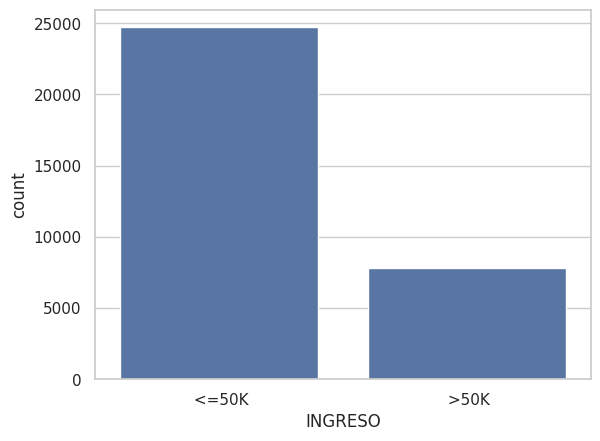

In [ ]:
#Se genera una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
Y=dataframe['INGRESO']
sns.countplot(x=Y)

Este gráfico muestra la distribución de ingresos en dos grupos:  
* Aquellos que ganan 50,000 dólares o menos al año y aquellos que ganan más.  
* La mayoría de las personas en la grafica, nos muestra que ganan 50,000 dólares o menos, lo que indica que este es el grupo más común en el conjunto de datos. El grupo que gana más de 50,000 dólares es considerablemente más pequeño, sugiriendo que hay menos personas que alcanzan este nivel de ingreso.

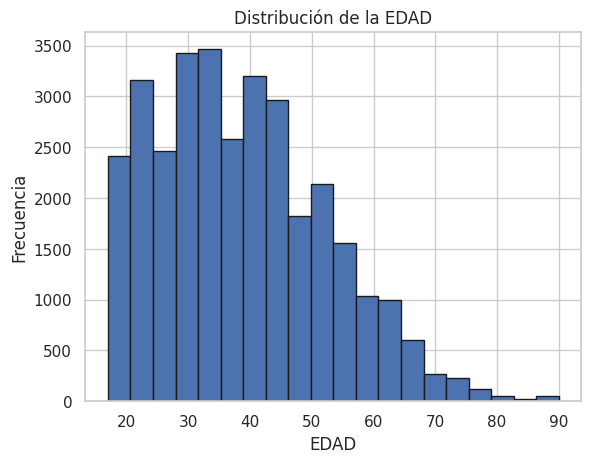

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la edad
plt.hist(dataframe['EDAD'], bins=20, edgecolor='k')
plt.xlabel('EDAD')
plt.ylabel('Frecuencia')
plt.title('Distribución de la EDAD')
plt.show()

La grafica nos muestra la distribución de edades de las personas, con la mayoría concentrada entre los **20 y 50 años**. Hay un pico notable en la frecuencia de personas en sus **30 y 40 años**, indicando que esta es la franja de edad más común.  
La cantidad disminuye progresivamente a medida que la edad aumenta, lo que sugiere que hay menos personas en el conjunto de datos que pertenecen a los grupos de mayores de edad.

<ipython-input-362-59da425a931d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




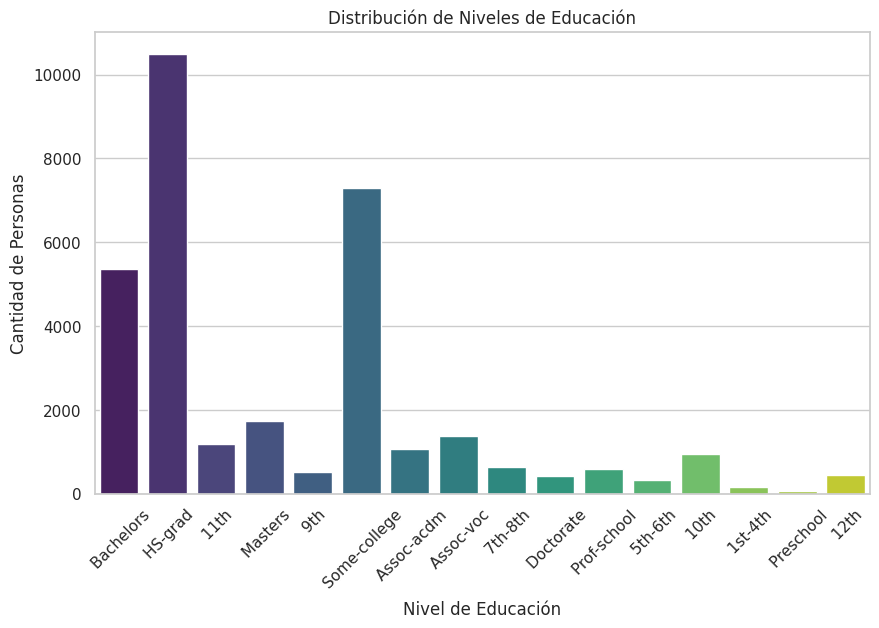

In [ ]:
# Gráfico de Barras de Educación
plt.figure(figsize=(10, 6))
sns.countplot(x='EDUCACION', data=dfOriginal, palette='viridis')
plt.xlabel('Nivel de Educación')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Niveles de Educación')
plt.xticks(rotation=45)
plt.show()

El gráfico muestra la cantidad de personas clasificadas por su nivel de educación. Los niveles con mayor frecuencia son el **secundario** o como en la grafica se encuentra **(HS-grad)**, seguido por algunos **estudios universitarios (some-college)** y la **licenciatura (Bachelors)**. Los grados avanzados como **maestría (Masters)** y **doctorado (Doctorate)** son menos comunes.  
Esto sugiere que la mayoría de las personas en la muestra han completado la educación secundaria y que hay un número significativo con educación superior, aunque los niveles de posgrado son menos frecuentes. Lo que da a entender las posibilidades o capacidades que tiene cada uno dentro de su area de trabajo al tener mayor o menos estudios, lo que esto podria influenciar en que una persona gane mas o menos de 50.000 por año.

<Axes: xlabel='NUMEDUCACION', ylabel='count'>

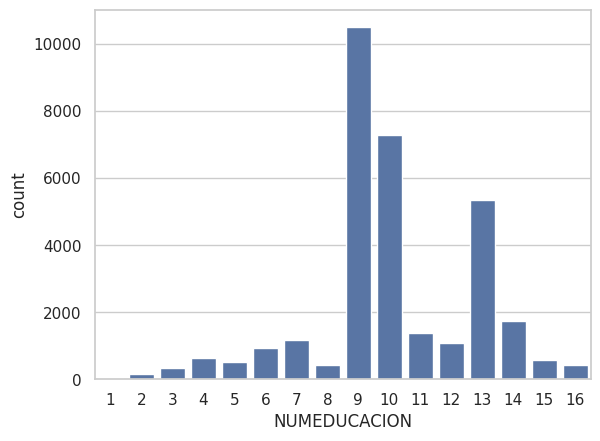

In [ ]:
Y=dataframe['NUMEDUCACION']
sns.countplot(x=Y)


El gráfico muestra la distribución del nivel de educación en una escala numérica, donde el valor más común es el número 9, que se destaca con la mayor cantidad de personas. Esto podría corresponder a la finalización de la educación secundaria. Hay una notable disminución en los niveles de educación superiores e inferiores a este punto, indicando que menos personas han alcanzado estos niveles de educación en la muestra. Los niveles más bajos y más altos de educación, representados por los números 1 y 16 respectivamente, tienen las frecuencias más bajas, sugiriendo que son los menos comunes entre la población estudiada.

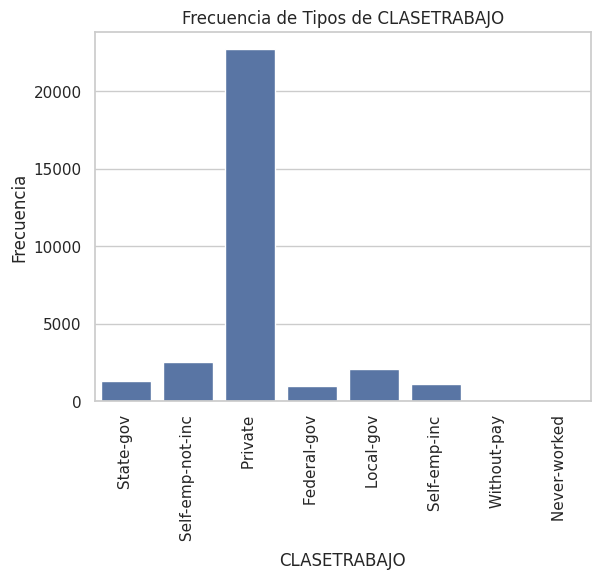

In [ ]:
sns.countplot(x='CLASETRABAJO', data=dataframe)
plt.xlabel('CLASETRABAJO')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de CLASETRABAJO')
plt.xticks(rotation=90)
plt.show()

El gráfico ilustra la frecuencia de los distintos tipos de empleo entre los participantes en el conjunto de datos. La categoría **'Private' (Privado)** domina ampliamente, indicando que la mayoría de las personas están empleadas en el sector privado. Las demás categorías, como el **gobierno estatal ('State-gov')**, el **autónomo incorporado ('Self-emp-inc')**, el **gobierno federal ('Federal-gov')** y otras, muestran frecuencias mucho menores. Esto sugiere que el empleo en el **sector privado** es la forma más común de empleo en esta muestra, mientras que las formas de a**utoempleo** y los **trabajos gubernamentales** son menos comunes, y muy pocas personas están **sin trabajo o nunca han trabajado.**

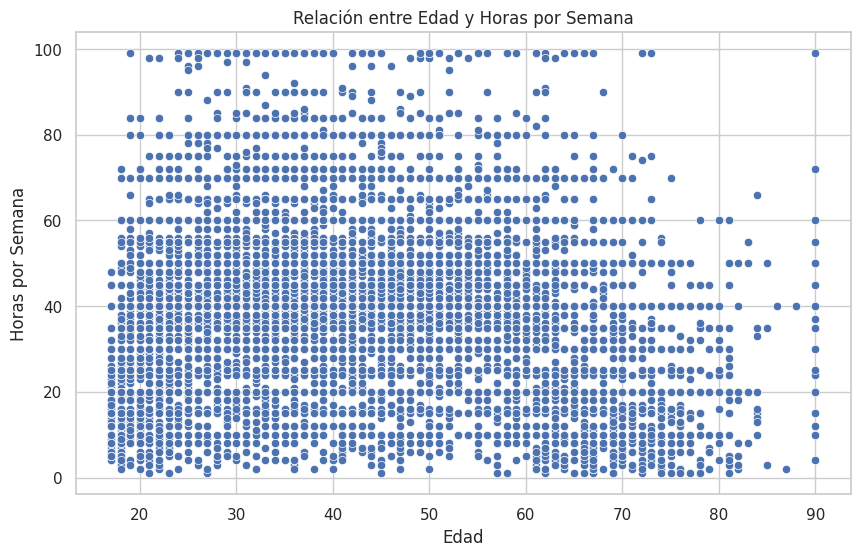

In [ ]:

# Diagrama de Dispersión de Edad vs. Horas por Semana
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EDAD', y='HORASPORSEMANA', data=dfOriginal)
plt.xlabel('Edad')
plt.ylabel('Horas por Semana')
plt.title('Relación entre Edad y Horas por Semana')
plt.show()

Este diagrama de dispersión muestra la relación entre la edad y las horas trabajadas por semana. Se puede observar que la mayoría de los puntos se concentran alrededor del rango de **30 a 60 horas por semana**, independientemente de la edad.

No hay una tendencia clara que indique que la edad afecte la cantidad de horas trabajadas, ya que personas de todas las edades trabajan una variedad de horas. Los datos también nos muestran algunos casos donde individuos trabajan muy pocas o muchas más horas de lo usual, indicando variabilidad en los tipos de empleo o en las condiciones laborales, lo cual esto seria crucial para el monto de 50.000 dolares por año.

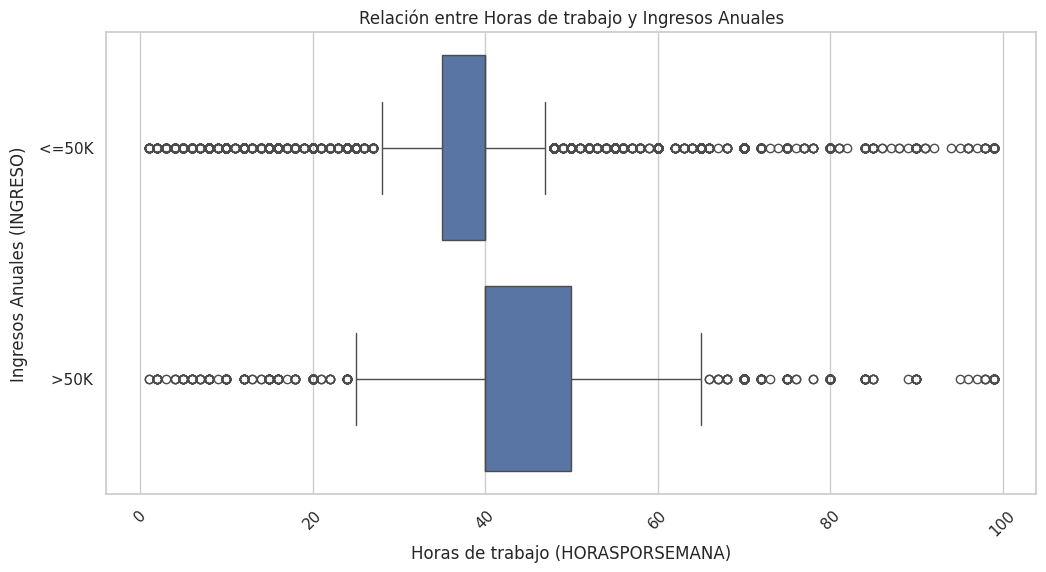

In [ ]:
#Ajustar el estilo de los gráficos (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de cajas y bigotes
plt.figure(figsize=(12, 6))
sns.boxplot(x="HORASPORSEMANA", y="INGRESO", data=dataframe)
plt.title("Relación entre Horas de trabajo y Ingresos Anuales")
plt.xlabel("Horas de trabajo (HORASPORSEMANA)")
plt.ylabel("Ingresos Anuales (INGRESO)")
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje X
plt.show()

Dentro del gráfico de cajas muestra la relación entre las horas de trabajo semanales y dos rangos de ingresos anuales, menos o igual a 50.000 dólares y más de 50.000 dólares.  
Se obseva que la caja para los que ganan menos o igual a 50.000 dólares es más ancha en el rango de horas de trabajo, indicando una mayor variabilidad en las horas que trabajan comparado con aquellos que ganan más de 50.000 dólares. Además, la mediana en ambos grupos está cerca de las **40 horas por semana**, lo que sugiere que es la jornada laboral más común.  
Los puntos fuera de las cajas representan **valores atípicos**, y como se puede ver, hay muchos en el grupo de ingresos menores o iguales a 50.000 dólares, lo que podría indicar que personas trabajando menos o mucho más de lo normal en este rango de ingresos. Esto podría implicar que en este grupo hay una diversidad de situaciones laborales, mientras que aquellos que ganan más de 50.000 dólares parecen tener jornadas laborales más consistentes.

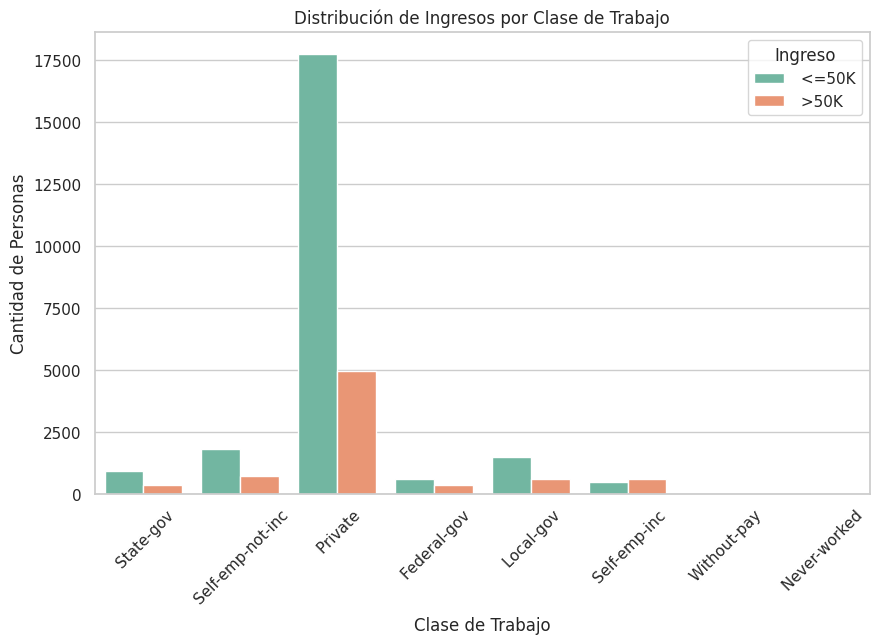

In [ ]:
# Gráfico de Barras de Clase de Trabajo por Ingreso
plt.figure(figsize=(10, 6))
sns.countplot(x='CLASETRABAJO', hue='INGRESO', data=dfOriginal, palette='Set2')
plt.xlabel('Clase de Trabajo')
plt.ylabel('Cantidad de Personas')
plt.title('Distribución de Ingresos por Clase de Trabajo')
plt.xticks(rotation=45)
plt.legend(title='Ingreso')
plt.show()

En este gráfico muestra la distribución de las personas según su clase de trabajo y si ganan más o menos de 50,000 dólares al año. La mayoría de las personas empleadas en el **sector privado** ganan menos de 50.000 dólares, con un número mucho menor que supera ese umbral. También hay representación de personas en el **gobierno estatal y federal**, así como autoempleados, pero estos grupos son considerablemente más pequeños.  
Los que trabajan por cuenta propia en su propia empresa **('Self-emp-inc')** muestran una proporción mayor de individuos que ganan más de 50.000 dólares en comparación con otros tipos de empleo. Aquellos sin paga o que nunca han trabajado tienen cifras mucho menores, y casi no aparecen en la categoría de ingresos superiores a 50.000 dólares. Esto sugiere que el tipo de empleo esta relacionado con el nivel de ingresos.

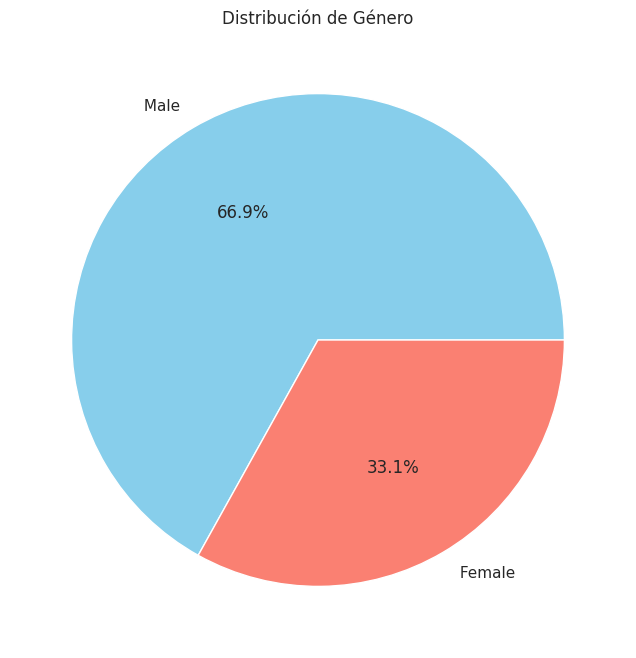

In [ ]:
# Gráfico de Pastel de Distribución de Género
plt.figure(figsize=(8, 8))
dfOriginal['SEXO'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Distribución de Género')
plt.ylabel('')
plt.show()

El gráfico de pastel muestra la distribución de género en el conjunto de datos, con una mayoría significativa del **66.9%** de individuos identificados como masculinos y el **33.1%** como femeninos. Esto indica que hay aproximadamente dos veces más hombres que mujeres en esta muestra particular.

In [ ]:
#Ordenar el DataFrame por una variable
dataframeTratamiento=dataframe.sort_values(by=['SEXO'])
dataframeTratamiento

EDAD       CLASETRABAJO  PESOFINAL      EDUCACION  NUMEDUCACION  \
32560    52       Self-emp-inc     287927        HS-grad             9   
8464     30            Private     156025        HS-grad             9   
8465     38          State-gov     149455        HS-grad             9   
8466     25            Private     359985        5th-6th             3   
26894    61            Private     162432   Some-college            10   
...     ...                ...        ...            ...           ...   
12967    52   Self-emp-not-inc     146579        HS-grad             9   
12964    46          State-gov      27243      Doctorate            16   
12963    21            Private     170108   Some-college            10   
12979    45            Private      84298      Assoc-voc            11   
16280    27            Private     187981        HS-grad             9   

         ESTADOMATRIMONIAL           OCUPACION        RELACION    RAZA  \
32560   Married-civ-spouse     Exec-managerial            Wife   White   
8464              Divorced     Exec-managerial       Unmarried   White   
8465         Never-married       Other-service       Unmarried   Black   
8466         Never-married        Adm-clerical   Not-in-family   White   
26894             Divorced       Other-service   Not-in-family   White   
...                    ...                 ...             ...     ...   
12967             Divorced               Sales       Unmarried   Black   
12964   Married-civ-spouse      Prof-specialty         Husband   White   
12963        Never-married       Other-service       Own-child   White   
12979   Married-civ-spouse     Exec-managerial         Husband   White   
16280        Never-married   Handlers-cleaners       Own-child   White   

          SEXO  GANANCIACAPITAL  PERDIDACAPITAL  HORASPORSEMANA  \
32560   Female            15024               0              40   
8464    Female                0               0              40   
8465    Female                0               0              40   
8466    Female                0               0              33   
26894   Female                0               0              40   
...        ...              ...             ...             ...   
12967     Male                0               0              40   
12964     Male             7688               0              45   
12963     Male                0               0              40   
12979     Male                0            1977              50   
16280     Male                0               0              40   

           PAISNATIVO INGRESO  
32560   United-States    >50K  
8464    United-States   <=50K  
8465    United-States   <=50K  
8466           Mexico   <=50K  
26894   United-States   <=50K  
...               ...     ...  
12967   United-States   <=50K  
12964   United-States    >50K  
12963   United-States   <=50K  
12979   United-States    >50K  
16280   United-States   <=50K  

[32561 rows x 15 columns]

La tabla muestra datos que refleja la diversidad socioeconómica y demográfica en una población, con su variedad de edades, ocupaciones y niveles educativos.  
Las personas que se muestran en la tabal están involucradas en distintos tipos de trabajo, desde autoempleados hasta empleados del gobierno, y tienen diferentes estados civiles y antecedentes raciales. Los ingresos anuales varían, con algunos ganando más y otros menos de 50.000 dólares, y las horas de trabajo semanales sugieren tanto empleo a tiempo completo como a tiempo parcial.  
Además, algunos individuos tienen ganancias de capital, mientras que otros no, y hay una mezcla de personas nativas de los Estados Unidos y de otros países, lo que apunta a un grupo de estudio heterogéneo.
Las personas que al parecer tienen ganancia capital se muestran que tambien ganan mas de 50.000 por año mientras que las que no tienen tales ganancias la mayoria gana menos de 50.000.
Tambien se puede identificar que para los empleados que se encuentran en un matrimonio o tienen familia ganan mas de 50.000 que los que estan divorciados o los que no estan casados.

In [ ]:
#Ordenar el DataFrame por una variable
dataframeTratamiento=dataframe.sort_values(by=['NUMEDUCACION'])
dataframeTratamiento

EDAD   CLASETRABAJO  PESOFINAL   EDUCACION  NUMEDUCACION  \
22940    25        Private     266820   Preschool             1   
13248    68        Private     168794   Preschool             1   
21370    61        Private      98350   Preschool             1   
25943    19        Private     277695   Preschool             1   
21388    24        Private     196678   Preschool             1   
...     ...            ...        ...         ...           ...   
10647    42      Local-gov     185129   Doctorate            16   
12074    33   Self-emp-inc     239018   Doctorate            16   
28758    65        Private     176796   Doctorate            16   
4597     55        Private      50164   Doctorate            16   
15708    49   Self-emp-inc      94606   Doctorate            16   

            ESTADOMATRIMONIAL           OCUPACION        RELACION  \
22940           Never-married     Farming-fishing   Not-in-family   
13248           Never-married   Machine-op-inspct   Not-in-family   
21370   Married-spouse-absent       Other-service   Not-in-family   
25943           Never-married     Farming-fishing   Not-in-family   
21388           Never-married   Machine-op-inspct       Own-child   
...                       ...                 ...             ...   
10647      Married-civ-spouse     Exec-managerial         Husband   
12074      Married-civ-spouse      Prof-specialty         Husband   
28758                 Widowed      Prof-specialty   Not-in-family   
4597       Married-civ-spouse     Exec-managerial         Husband   
15708      Married-civ-spouse      Prof-specialty         Husband   

                      RAZA     SEXO  GANANCIACAPITAL  PERDIDACAPITAL  \
22940                White     Male                0               0   
13248                White     Male                0               0   
21370   Asian-Pac-Islander     Male                0               0   
25943                White     Male                0               0   
21388                White   Female                0               0   
...                    ...      ...              ...             ...   
10647                White     Male                0               0   
12074                White     Male                0               0   
28758                White   Female                0               0   
4597                 White     Male                0               0   
15708                Black     Male                0               0   

       HORASPORSEMANA      PAISNATIVO INGRESO  
22940              35          Mexico   <=50K  
13248              10   United-States   <=50K  
21370              40           China   <=50K  
25943              36            Hong   <=50K  
21388              30   United-States   <=50K  
...               ...             ...     ...  
10647              43             NaN    >50K  
12074              60   United-States   <=50K  
28758              40   United-States   <=50K  
4597               60   United-States    >50K  
15708              60   United-States    >50K  

[32561 rows x 15 columns]

La tabla ordenada por nivel de educación muestra un amplio espectro de situaciones personales y profesionales en una población diversa. Desde individuos jóvenes y nunca casados con educación de nivel preescolar trabajando en agricultura o operaciones de máquinas, hasta personas de mediana edad con doctorados y ocupaciones especializadas o gerenciales.  
La mayoría de las personas listadas no tienen ganancias ni pérdidas de capital significativas y trabajan una cantidad de horas que sugiere empleo a tiempo completo.  
Además, el nivel de ingreso varía, con personas tanto por encima como por debajo del umbral de los 50.000 dólares. Esta tabla refleja la diversidad cultural con individuos de diferentes orígenes, incluyendo Estados Unidos, México y China, lo que destaca la naturaleza multicultural de la población estudiada.

# ANALISIS DE VARIABLES CATEGORICAS

In [ ]:
def descripcionCantidadCategorias(dataframe, categorical_features):
    cantidadTotalVariables = len(dataframe.columns)
    cantidadVariablesCategoricas = len(categorical_features)
    for variable in categorical_features:
        cantidadCategorías=dataframe[variable].nunique()
        print('Cantidad de categorías en la variable',variable,':',cantidadCategorías)
    return cantidadVariablesCategoricas

In [ ]:
categorical_features=['CLASETRABAJO','EDUCACION','ESTADOMATRIMONIAL','OCUPACION','RELACION','RAZA',
                      'SEXO','PAISNATIVO', 'INGRESO']


In [ ]:
cantidadVariablesCategoricas=descripcionCantidadCategorias(dataframe, categorical_features)
print('cantidad de variables categóricas:',cantidadVariablesCategoricas)

Cantidad de categorías en la variable CLASETRABAJO : 8
Cantidad de categorías en la variable EDUCACION : 16
Cantidad de categorías en la variable ESTADOMATRIMONIAL : 7
Cantidad de categorías en la variable OCUPACION : 14
Cantidad de categorías en la variable RELACION : 6
Cantidad de categorías en la variable RAZA : 5
Cantidad de categorías en la variable SEXO : 2
Cantidad de categorías en la variable PAISNATIVO : 41
Cantidad de categorías en la variable INGRESO : 2
cantidad de variables categóricas: 9


In [ ]:
import pandas as pd

def descripcionCantidadCategorias(dataframe, categorical_features):
    categorias_data = []  # Lista para almacenar los datos de las categorías

    for variable in categorical_features:
        cantidadCategorías = dataframe[variable].nunique()
        categorias = dataframe[variable].unique()  # Obtener todas las categorías únicas
        categorias_data.append({'Variable': variable, 'Cantidad de categorías': cantidadCategorías, 'Categorías': categorias})

    categorias_df = pd.DataFrame(categorias_data)  # Convertir la lista de datos en un DataFrame
    return categorias_df

categorical_features = ['CLASETRABAJO', 'EDUCACION', 'ESTADOMATRIMONIAL', 'OCUPACION', 'RELACION', 'RAZA',
                        'SEXO', 'PAISNATIVO', 'INGRESO']
categorias_df = descripcionCantidadCategorias(dataframe, categorical_features)
print(categorias_df)


            Variable  Cantidad de categorías  \
0       CLASETRABAJO                       8   
1          EDUCACION                      16   
2  ESTADOMATRIMONIAL                       7   
3          OCUPACION                      14   
4           RELACION                       6   
5               RAZA                       5   
6               SEXO                       2   
7         PAISNATIVO                      41   
8            INGRESO                       2   

                                          Categorías  
0  [ State-gov,  Self-emp-not-inc,  Private,  Fed...  
1  [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...  
2  [ Never-married,  Married-civ-spouse,  Divorce...  
3  [ Adm-clerical,  Exec-managerial,  Handlers-cl...  
4  [ Not-in-family,  Husband,  Wife,  Own-child, ...  
5  [ White,  Black,  Asian-Pac-Islander,  Amer-In...  
6                                   [ Male,  Female]  
7  [ United-States,  Cuba,  Jamaica,  India, nan,...  
8                       

El análisis de los datos, nos dice que hay 8 categorías diferentes bajo el tipo de trabajo y 16 niveles educativos distintos.  
El estado matrimonial presenta 7 categorías, mientras que hay 14 tipos de ocupaciones y 6 relaciones familiares. La variable raza tiene 5 categorías, y hay una distinción binaria en género. Sorprendentemente, hay 41 países de origen, mostrando una gran diversidad en esta área. Hay dos niveles de ingresos que están siendo comparados. En total, se han identificado 9 variables categóricas, proporcionando una perspectiva de la variedad y complejidad de los datos recopilados de los encuestados.

Lo cual coincide con la información adicional de la pagina web del dataset que nos indica que:

ingreso:>50K, <=50K.
edad: continua.
clase de trabajo: Privado, Trabajador por cuenta propia, Trabajador por cuenta propia (incorporado), Gobierno federal, Gobierno local, Gobierno estatal, Sin pago, Nunca trabajó.
pesofinal: continua.
educación: Licenciatura, Algo de universidad, 11° grado, Graduado de secundaria, Escuela profesional, Asociado en educación superior, Asociado en vocaciones, 9° grado, 7°-8° grado, 12° grado, Maestría, 1°-4° grado, 10° grado, Doctorado, 5°-6° grado, Preescolar.
número de educación: continua.
estado civil: Casado/a civilmente, Divorciado/a, Nunca casado/a, Separado/a, Viudo/a, Casado/a pero cónyuge ausente, Casado/a en las fuerzas armadas.
ocupación: Soporte técnico, Reparación de oficios, Otros servicios, Ventas, Ejecutivo/gerente, Especialidad profesional, Limpiadores y ayudantes, Inspección de operaciones de máquinas, Administrativo/clerical, Agricultura/pesca, Transporte/movimiento, Servicio doméstico privado, Servicio protector, Fuerzas Armadas.
relación: Esposa, Hijo/a propio/a, Esposo, No familiar, Otro pariente, Soltero/a.
raza: Blanca, Asiático-isleño del Pacífico, Amerindio-esquimal, Otro, Negra.
sexo: Femenino, Masculino.
ganancia de capital: continua.
pérdida de capital: continua.
horas por semana: continua.
país nativo: Estados Unidos, Camboya, Inglaterra, Puerto Rico, Canadá, Alemania, Fuera de EE. UU. (Guam-USVI-etc), India, Japón, Grecia, Sur, China, Cuba, Irán, Honduras, Filipinas, Italia, Polonia, Jamaica, Vietnam, México, Portugal, Irlanda, Francia, República Dominicana, Laos, Ecuador, Taiwán, Haití, Colombia, Hungría, Guatemala, Nicaragua, Escocia, Tailandia, Yugoslavia, El Salvador, Trinidad y Tobago, Perú, Hong Kong, Holanda.

# Analisis de Correlacion

In [ ]:
#Análisis entre dos variables: x, y
x = np.array([5,5,1])
y = np.array([1,2,5])

#Covarianza
covariance = np.cov(x, y, bias=True)[0][1]
#bias: False para (N - 1) si es una muestra, True para (N) si es toda la población
print('Covarianza:',covariance)

#Diccionario
dict = {'X': x,
        'Y': y}
#Creación de dataframe a partir de un diccionario
df = pd.DataFrame(dict)

#Desviación estándar de una variable
std=df['Y'].std(ddof=0)
print('Desviación estándar:',std)

#Correlaciones
df.corr()

Covarianza: -3.111111111111111
Desviación estándar: 1.699673171197595


X         Y
X  1.000000 -0.970725
Y -0.970725  1.000000

Se calcula la covarianza, que es una medida de cómo cambian conjuntamente las dos variables. Aquí, la covarianza es negativa, lo que indica que cuando una variable aumentqa, la otra tiende a disminuir. La desviación estándar de "y" se calcula también, mostrando la dispersión de los datos de "y". Finalmente, el coeficiente de correlación, que oscila entre -1 y 1, es negativo y cercano a -1, lo que sugiere una fuerte correlación negativa entre "x" y "y". Esto significa que las variables están inversamente relacionadas: a medida que una aumenta, la otra disminuye con una relación lineal bastante consistente.

In [ ]:
#Análisis entre tres variables: u1, u2, u3
u1 = np.array([5,1])
u2 = np.array([5,2])
u3 = np.array([1,5])

#Covarianza
covariance = np.cov(u2, u3, bias=True)[0][1]
#bias: False para (N - 1) si es una muestra, True para (N) si es toda la población
print('Covarianza:',covariance)

#Diccionario
dict = {'u1': u1,
        'u2': u2,
        'u3': u3}

#Creación de dataframe a partir de un diccionario
df = pd.DataFrame(dict)

#Desviación estándar de una variable
std=df['u3'].std(ddof=0)
print('Desviación estándar:',std)

#Correlaciones
df.corr()

Covarianza: -3.0
Desviación estándar: 2.0


u1   u2   u3
u1  1.0  1.0 -1.0
u2  1.0  1.0 -1.0
u3 -1.0 -1.0  1.0

Esta parte de aqui calcula la covarianza entre u2 y u3, mostrando cómo estas dos variables varían juntas, y el resultado es -3.0, lo que indica una relación inversa fuerte. La desviación estándar de u3 es de 2.0, lo que muestra la cantidad de variación o dispersión de este conjunto de datos. Además, la matriz de correlación resultante indica una correlación perfecta de 1 entre u1 y u2, y una correlación negativa perfecta de -1 entre u1 y u3 y entre u2 y u3. Esto significa que u1 y u2 se mueven juntos en la misma dirección, mientras que u3 se mueve en la dirección opuesta a u1 y u2. Estas correlaciones perfectas sugieren relaciones lineales exactas entre las variables.

In [ ]:
#Análisis entre todas las variables
cr=dataframe.corr(numeric_only = True)
cr.head()

EDAD  PESOFINAL  NUMEDUCACION  GANANCIACAPITAL  \
EDAD             1.000000  -0.076646      0.036527         0.077674   
PESOFINAL       -0.076646   1.000000     -0.043195         0.000432   
NUMEDUCACION     0.036527  -0.043195      1.000000         0.122630   
GANANCIACAPITAL  0.077674   0.000432      0.122630         1.000000   
PERDIDACAPITAL   0.057775  -0.010252      0.079923        -0.031615   

                 PERDIDACAPITAL  HORASPORSEMANA  
EDAD                   0.057775        0.068756  
PESOFINAL             -0.010252       -0.018768  
NUMEDUCACION           0.079923        0.148123  
GANANCIACAPITAL       -0.031615        0.078409  
PERDIDACAPITAL         1.000000        0.054256


Dentro del analisis de las correlaciones entre las variables son en su mayoría bajas, indicando que no hay una relación lineal fuerte entre ellas. Por ejemplo, la edad y el peso final tienen una correlación ligeramente negativa, lo que sugiere que no hay una relación directa y significativa entre ambas. La educación muestra una correlación positiva moderada con las horas trabajadas por semana, posiblemente indicando que un mayor nivel educativo podría estar ligeramente asociado con trabajar más horas. Las ganancias y pérdidas de capital tienen una correlación muy baja con las otras variables, sugiriendo que estos factores financieros son independientes de la edad, el peso final y el nivel de educación en esta muestra.

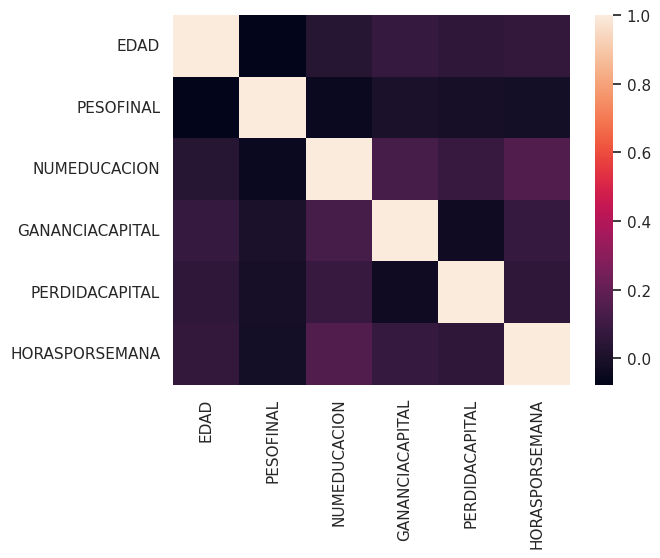

In [ ]:
#Un mapa de calor simple
sns.heatmap(cr)
plt.savefig('attribute_correlations.png')

Dentro de este mapa de calor, lo que se llego a observar es las relaciones que tiene cada variable con otra, por ende nos dimos cuenta que el **"PESOFINAL"** es una variable completamente irrelevante, ya que dentro de la grafica su color es muy oscuro comparado con los demas, por ende para las variables utilizables, no contaremos con **"PESOFINAL"**.

<Axes: >

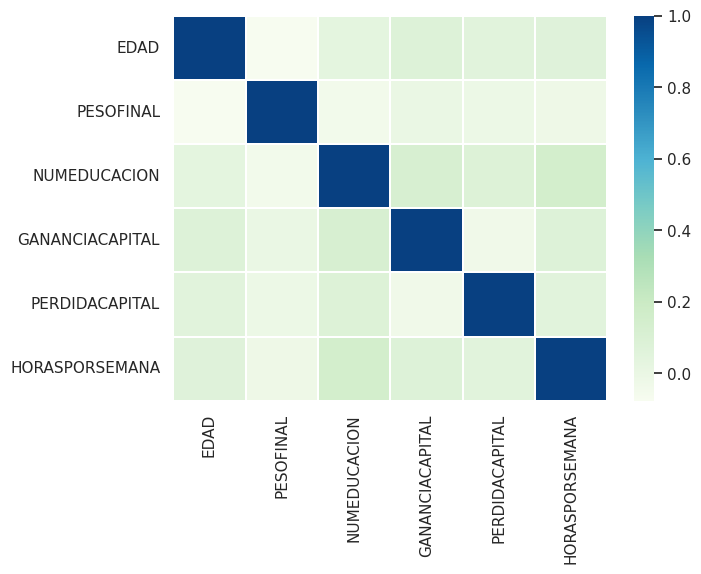

In [ ]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax = plt.subplots(figsize = (7, 5))
#sns.heatmap(cr, cmap ='viridis', linewidths = 0.30, annot = True)
sns.heatmap(cr, cmap ='GnBu', linewidths = 0.30, annot = False)

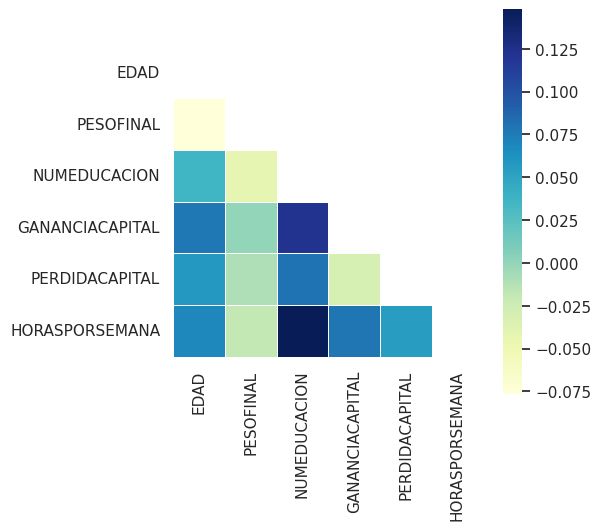

In [ ]:
#Un mapa de calor personalizado: colores, región inferior a la diagonal, tamaño
mask = np.zeros_like(cr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(cr, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.savefig('attribute_correlations.png')

En las imágenes muestran respectivamente los mapas de calor que representan la correlación entre varias variables numéricas. Los colores más oscuros indican correlaciones más fuertes. Los valores de correlación son todos cercanos a cero, lo que sugiere que no hay una relación lineal significativa entre estas variables. Estos mapas de calor proporcionan una forma rápida de visualizar y evaluar la fuerza y la dirección de las relaciones entre múltiples variables a la vez.

In [ ]:
#Análisis a partir de los valores: correlaciones positivas
dfCorrOrdenado=cr.sort_values(by=['HORASPORSEMANA'], ascending=False)
dfCorrOrdenado['HORASPORSEMANA'].head(10)

HORASPORSEMANA     1.000000
NUMEDUCACION       0.148123
GANANCIACAPITAL    0.078409
EDAD               0.068756
PERDIDACAPITAL     0.054256
PESOFINAL         -0.018768
Name: HORASPORSEMANA, dtype: float64

Presenta una serie de correlaciones de la variable "HORASPORSEMANA" con otras variables, ordenadas de la más fuerte a la más débil. La educación ("NUMEDUCACION") y las ganancias de capital ("GANANCIACAPITAL") tienen las correlaciones positivas más fuertes con las horas trabajadas por semana, lo que sugiere que a mayor nivel de educación y mayores ganancias de capital, existe una tendencia a trabajar más horas.  
La edad también muestra una correlación positiva moderada, indicando que la cantidad de horas trabajadas podría aumentar con la edad. Interesantemente, hay una correlación negativa con el "PESOFINAL", aunque es muy leve. Esto proporciona una vista rápida de qué factores están más alineados con el tiempo de trabajo semanal.

In [ ]:
#Análisis a partir de los valores: correlaciones negativas
dfCorrOrdenado=cr.sort_values(by=['HORASPORSEMANA'], ascending=True)
dfCorrOrdenado['HORASPORSEMANA'].head(10)

PESOFINAL         -0.018768
PERDIDACAPITAL     0.054256
EDAD               0.068756
GANANCIACAPITAL    0.078409
NUMEDUCACION       0.148123
HORASPORSEMANA     1.000000
Name: HORASPORSEMANA, dtype: float64

Dentro de la correlacion negativa tenemos que se ha realizado un análisis de correlación centrado en las correlaciones negativas relacionadas con las horas de trabajo por semana ("HORASPORSEMANA"). El único valor negativo es la correlación con "PESOFINAL", que es ligeramente negativa. Esto sugiere que podría haber una tendencia débil a que las personas con un peso final mayor trabajen menos horas, pero la relación no es fuerte y debería interpretarse con cautela.

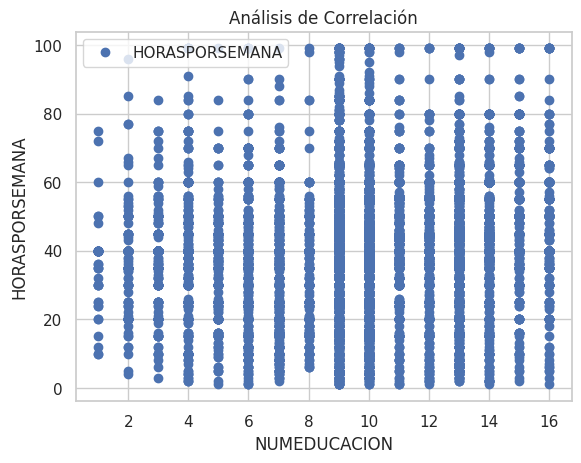

In [ ]:
#Visualización para análisis entre dos variables
variable1Analisis='NUMEDUCACION'
variable2Analisis='HORASPORSEMANA'
dataframe.plot(x=variable1Analisis, y=variable2Analisis, style='o')
plt.title('Análisis de Correlación')
plt.xlabel(variable1Analisis)
plt.ylabel(variable2Analisis)
plt.show()

-MEJORAR
El análisis de la correlación entre las variables numéricas del conjunto de datos de Ingresos del Censo ofrece información valiosa sobre las consideraciones socioeconómicas ideales para las personas en el mercado laboral. Aunque el conjunto de datos se centra principalmente en atributos numéricos como la edad, el nivel educativo y las ganancias de capital, proporciona una visión de los factores que pueden contribuir a ingresos más altos. Lo cual veremos los cambios adelante:

# Manejo de datos faltantes y variables no relevantes

In [ ]:
dataframe = dataframe.dropna()

print("Tamaño del conjunto de datos después de eliminar filas con valores NaN:", dataframe.shape)


Tamaño del conjunto de datos después de eliminar filas con valores NaN: (30162, 15)


In [ ]:
valores_faltantes = dataframe.isnull().sum()
print("\nValores faltantes:")
print(valores_faltantes)

tamaño = dataframe.shape
print("Tamaño del conjunto de datos:", tamaño)

num_variables = dataframe.shape[1]
num_observaciones = dataframe.shape[0]
print("Cantidad de variables:", num_variables)
print("Cantidad de observaciones:", num_observaciones)


Valores faltantes:
EDAD                 0
CLASETRABAJO         0
PESOFINAL            0
EDUCACION            0
NUMEDUCACION         0
ESTADOMATRIMONIAL    0
OCUPACION            0
RELACION             0
RAZA                 0
SEXO                 0
GANANCIACAPITAL      0
PERDIDACAPITAL       0
HORASPORSEMANA       0
PAISNATIVO           0
INGRESO              0
dtype: int64
Tamaño del conjunto de datos: (30162, 15)
Cantidad de variables: 15
Cantidad de observaciones: 30162


Se ha eliminado todas las filas que contenían valores NaN utilizando el método dropna() de pandas. Se ha realizado una limpieza exitosa de un conjunto de datos en Python, eliminando filas con datos faltantes y confirmando que no hay valores ausentes en ninguna de las 15 variables restantes, conservando un total de 30,162 observaciones. Este resultado indica que el conjunto de datos está ahora limpio y completo, ideal para el análisis detallado sin la preocupación de manejar datos faltantes.

In [ ]:
# Reemplazar la variable de salida INGRESO
dataframe.loc[dataframe['INGRESO'] == ' <=50K', 'INGRESO'] = 1
dataframe.loc[dataframe['INGRESO'] == ' >50K', 'INGRESO'] = 2

# Mostrar las primeras filas del DataFrame modificado
dataframe


EDAD       CLASETRABAJO  PESOFINAL    EDUCACION  NUMEDUCACION  \
0        39          State-gov      77516    Bachelors            13   
1        50   Self-emp-not-inc      83311    Bachelors            13   
2        38            Private     215646      HS-grad             9   
3        53            Private     234721         11th             7   
4        28            Private     338409    Bachelors            13   
...     ...                ...        ...          ...           ...   
32556    27            Private     257302   Assoc-acdm            12   
32557    40            Private     154374      HS-grad             9   
32558    58            Private     151910      HS-grad             9   
32559    22            Private     201490      HS-grad             9   
32560    52       Self-emp-inc     287927      HS-grad             9   

         ESTADOMATRIMONIAL           OCUPACION        RELACION    RAZA  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

          SEXO  GANANCIACAPITAL  PERDIDACAPITAL  HORASPORSEMANA  \
0         Male             2174               0              40   
1         Male                0               0              13   
2         Male                0               0              40   
3         Male                0               0              40   
4       Female                0               0              40   
...        ...              ...             ...             ...   
32556   Female                0               0              38   
32557     Male                0               0              40   
32558   Female                0               0              40   
32559     Male                0               0              20   
32560   Female            15024               0              40   

           PAISNATIVO INGRESO  
0       United-States       1  
1       United-States       1  
2       United-States       1  
3       United-States       1  
4                Cuba       1  
...               ...     ...  
32556   United-States       1  
32557   United-States       2  
32558   United-States       1  
32559   United-States       1  
32560   United-States       2  

[30162 rows x 15 columns]

Dentro de la tabla las categorías de ingreso se han simplificado en dos clases numéricas: '1' para ingresos menores o iguales a 50,000 y '2' para ingresos superiores a 50,000. Este paso es crucial para la aplicación de algoritmos de aprendizaje automático que requieren entradas numéricas. La visualización de las filas del DataFrame modificado confirma que la codificación se ha aplicado correctamente.

In [ ]:
#Se eliminan algunas variables
dfOriginal=copy.deepcopy(dataframe)
print(dfOriginal.shape)
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X"
Y=dataframe['INGRESO']
dataframe=dataframe.drop(['INGRESO'], axis=1)
dataframe=dataframe.drop(['RELACION'], axis=1)
dataframe=dataframe.drop(['EDUCACION'], axis=1)
dataframe=dataframe.drop(['PESOFINAL'], axis=1)
print(dataframe.shape)
dataframe.head()

(30162, 15)
(30162, 11)


EDAD       CLASETRABAJO  NUMEDUCACION    ESTADOMATRIMONIAL  \
0    39          State-gov            13        Never-married   
1    50   Self-emp-not-inc            13   Married-civ-spouse   
2    38            Private             9             Divorced   
3    53            Private             7   Married-civ-spouse   
4    28            Private            13   Married-civ-spouse   

            OCUPACION    RAZA     SEXO  GANANCIACAPITAL  PERDIDACAPITAL  \
0        Adm-clerical   White     Male             2174               0   
1     Exec-managerial   White     Male                0               0   
2   Handlers-cleaners   White     Male                0               0   
3   Handlers-cleaners   Black     Male                0               0   
4      Prof-specialty   Black   Female                0               0   

   HORASPORSEMANA      PAISNATIVO  
0              40   United-States  
1              13   United-States  
2              40   United-States  
3              40   United-States  
4              40            Cuba


En esta etapa del procesamiento de datos, se ha refinado el conjunto de datos eliminando variables menos relevantes para el análisis predictivo, tales como 'RELACION', 'EDUCACION', 'PESOFINAL' y 'INGRESO', que es la variable objetivo. Esto se hace para enfocarse en las variables más significativas que contribuirán al poder predictivo del modelo. Con la variable objetivo y las variables no predictoras fuera del conjunto de datos, se ha reducido de 15 a 11 variables, preparando el conjunto de datos para un modelo más eficiente. Ahora se dispone de un conjunto de datos más limpio y centrado que probablemente mejorará la calidad del análisis predictivo y facilitará la interpretación de los resultados.

Antes de proceder con el resto del análisis, decidimos integrar la gran cantidad de variables categóricas a los siguientes cálculos transformandoles en variables numéricas mediante un pipeline y veremos como ahora tomando estas nuevas consideraciones como impacta los resultados en cuanto a las correlaciones y le haremos comparaciones con la anterior que solo contaba con las variables numéricas.

In [ ]:
#Determinación de tipos de variables
categorical_ordinal_features = []
categorical_nominal_features = ['CLASETRABAJO','ESTADOMATRIMONIAL','OCUPACION', 'RAZA', 'SEXO', 'PAISNATIVO']
numeric_features = ['EDAD','NUMEDUCACION','GANANCIACAPITAL','PERDIDACAPITAL','HORASPORSEMANA']

In [ ]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [ ]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  11
Cantidad de categorías en la variable categórica nominal CLASETRABAJO : 7
Cantidad de categorías en la variable categórica nominal ESTADOMATRIMONIAL : 7
Cantidad de categorías en la variable categórica nominal OCUPACION : 14
Cantidad de categorías en la variable categórica nominal RAZA : 5
Cantidad de categorías en la variable categórica nominal SEXO : 2
Cantidad de categorías en la variable categórica nominal PAISNATIVO : 41
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  76
Cantidad de variables que habrá después de la transformación de variables:  81


El proceso de análisis ha identificado y contabilizado las diferentes categorías dentro de las variables nominales del conjunto de datos, lo que resulta en un total de 76 variables binarias que serán creadas para reemplazar las variables nominales originales.  
Después de transformar las variables categóricas nominales en binarias, se proyecta que el conjunto de datos tendrá un total de 81 variables. Esto prepara el conjunto de datos para la aplicación de modelos de aprendizaje automático, que requieren que las variables categóricas se expresen en un formato que se pueda ingresar en algoritmos que solo aceptan entradas numéricas. Con esta transformación, se ha aumentado la dimensión del conjunto de datos para reflejar mejor la información contenida en las variables categóricas, facilitando así un análisis más detallado y preciso.

In [ ]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

Esta seccion configura un conjunto de transformadores para preprocesar los datos antes de aplicar técnicas de aprendizaje automático. Estos transformadores incluyen la conversión de variables categóricas a numéricas, la normalización y estandarización de variables numéricas, y la imputación de valores faltantes. Este preprocesamiento es un paso crítico que asegura que los datos estén en un formato adecuado y estandarizado para maximizar la eficacia de los modelos predictivos. Al aplicar estos transformadores, se ha mejorado la calidad de los datos, lo que puede llevar a un análisis más preciso y a predicciones más confiables.

In [ ]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    #('prepstandard', preprocesorStandardScaler)
    ('prepminmax', preprocesorMinMax)
])

Esta pipeline está diseñada para automatizar el flujo de trabajo de preprocesamiento de datos, incorporando un preprocesador para convertir variables categóricas en numéricas y un preprocesador 'MinMaxScaler' para la normalización de variables. Estas transformaciones preparan el conjunto de datos para el análisis y modelado de manera eficiente y reproducible, lo que es fundamental para garantizar la validez y fiabilidad de cualquier modelo resultante.

In [ ]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn"
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
print(dataframeTransformado.shape)
dataframeTransformado.head()


********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False,
                               sparse_output=False))]), ['CLASETRABAJO', 'ESTADOMATRIMONIAL', 'OCUPACION', 'RAZA', 'SEXO', 'PAISNATIVO'])
********** Lista de variables:
['CLASETRABAJO_ Federal-gov', 'CLASETRABAJO_ Local-gov', 'CLASETRABAJO_ Private', 'CLASETRABAJO_ Self-emp-inc', 'CLASETRABAJO_ Self-emp-not-inc', 'CLASETRABAJO_ State-gov', 'CLASETRABAJO_ Without-pay', 'ESTADOMATRIMONIAL_ Divorced', 'ESTADOMATRIMONIAL_ Married-AF-spouse', 'ESTADOMATRIMONIAL_ Married-civ-spouse', 'ESTADOMATRIMONIAL_ Married-spouse-absent', 'ESTADOMATRIMONIAL_ Never-married', 'ESTADOMATRIMONIAL_ Separated', 'ESTADOMATRIMONIAL_ Widowed', 'OCUPACION_ Adm-clerical', 'OCUPACION_ Armed-Forces', 'OCUPACION_ Craft-repair', 'OCUPACION_ Exec-managerial', 'OCUPACION_ Farming-fishing', 'OCUPACION_ Handlers-cleaners', 'OCUPACION_ Machine-

CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  CLASETRABAJO_ Private  \
0                        0.0                      0.0                    0.0   
1                        0.0                      0.0                    0.0   
2                        0.0                      0.0                    1.0   
3                        0.0                      0.0                    1.0   
4                        0.0                      0.0                    1.0   

   CLASETRABAJO_ Self-emp-inc  CLASETRABAJO_ Self-emp-not-inc  \
0                         0.0                             0.0   
1                         0.0                             1.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   CLASETRABAJO_ State-gov  CLASETRABAJO_ Without-pay  \
0                      1.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   ESTADOMATRIMONIAL_ Divorced  ESTADOMATRIMONIAL_ Married-AF-spouse  \
0                          0.0                                   0.0   
1                          0.0                                   0.0   
2                          1.0                                   0.0   
3                          0.0                                   0.0   
4                          0.0                                   0.0   

   ESTADOMATRIMONIAL_ Married-civ-spouse  ...  PAISNATIVO_ Trinadad&Tobago  \
0                                    0.0  ...                          0.0   
1                                    1.0  ...                          0.0   
2                                    0.0  ...                          0.0   
3                                    1.0  ...                          0.0   
4                                    1.0  ...                          0.0   

   PAISNATIVO_ United-States  PAISNATIVO_ Vietnam  PAISNATIVO_ Yugoslavia  \
0                        1.0                  0.0                     0.0   
1                        1.0                  0.0                     0.0   
2                        1.0                  0.0                     0.0   
3                        1.0                  0.0                     0.0   
4                        0.0                  0.0                     0.0   

       EDAD  NUMEDUCACION  GANANCIACAPITAL  PERDIDACAPITAL  HORASPORSEMANA  \
0  0.301370      0.800000          0.02174             0.0        0.397959   
1  0.452055      0.800000          0.00000             0.0        0.122449   
2  0.287671      0.533333          0.00000             0.0        0.397959   
3  0.493151      0.400000          0.00000             0.0        0.397959   
4  0.150685      0.800000          0.00000             0.0        0.397959   

   INGRESO  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 82 columns]

La ejecución del pipeline de preprocesamiento ha transformado el conjunto de datos, aplicando técnicas de codificación 'one-hot' a las variables categóricas, resultando en una expansión del número de características a 82. Esta técnica convierte cada categoría de una variable en una nueva columna binaria, lo que facilita la utilización de los datos en modelos de aprendizaje automático que requieren entradas numéricas. El resultado es un DataFrame preparado para el análisis que refleja con mayor precisión la información contenida en las variables originales, ahora representadas como un conjunto extenso de indicadores binarios, lo que mejora el rendimiento del programa.

In [ ]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

Este fragmento de código proporciona dos funciones para manejar la serialización de un pipeline de preprocesamiento o modelo de machine learning.  
* La primera función, guardarPipeline, utiliza la biblioteca pickle para guardar el objeto pipeline en un archivo, lo que permite su almacenamiento persistente en el disco.  
* La segunda función, cargarPipeline, recupera y carga este objeto desde el archivo guardado. Estas funciones son esenciales para conservar el estado del pipeline para su uso futuro sin tener que reentrenar o reconfigurar, ofreciendo una forma eficiente y segura de desplegar modelos entrenados en diferentes entornos o para hacer predicciones en nuevos datos de entrada.

In [ ]:
guardarPipeline(pipe,'pipePreprocesadores')
pipe=None
pipe=cargarPipeline('pipePreprocesadores')
set_config(display='diagram')
pipe

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  []),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['CLASETRABAJO',
                                                   'ESTADOMATRIMONIAL',
                                                   'OCUPACION', 'RAZA', 'SEXO',
                                                   'PAISNATIVO'])])),
                ('prepminmax',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tranminmax',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])]))])

In [ ]:
dfCorrel=dataframeTransformado.corr()
dfCorrel.head()

CLASETRABAJO_ Federal-gov  \
CLASETRABAJO_ Federal-gov                        1.000000   
CLASETRABAJO_ Local-gov                         -0.048728   
CLASETRABAJO_ Private                           -0.302194   
CLASETRABAJO_ Self-emp-inc                      -0.034520   
CLASETRABAJO_ Self-emp-not-inc                  -0.053995   

                                CLASETRABAJO_ Local-gov  \
CLASETRABAJO_ Federal-gov                     -0.048728   
CLASETRABAJO_ Local-gov                        1.000000   
CLASETRABAJO_ Private                         -0.456267   
CLASETRABAJO_ Self-emp-inc                    -0.052120   
CLASETRABAJO_ Self-emp-not-inc                -0.081525   

                                CLASETRABAJO_ Private  \
CLASETRABAJO_ Federal-gov                   -0.302194   
CLASETRABAJO_ Local-gov                     -0.456267   
CLASETRABAJO_ Private                        1.000000   
CLASETRABAJO_ Self-emp-inc                  -0.323228   
CLASETRABAJO_ Self-emp-not-inc              -0.505588   

                                CLASETRABAJO_ Self-emp-inc  \
CLASETRABAJO_ Federal-gov                        -0.034520   
CLASETRABAJO_ Local-gov                          -0.052120   
CLASETRABAJO_ Private                            -0.323228   
CLASETRABAJO_ Self-emp-inc                        1.000000   
CLASETRABAJO_ Self-emp-not-inc                   -0.057754   

                                CLASETRABAJO_ Self-emp-not-inc  \
CLASETRABAJO_ Federal-gov                            -0.053995   
CLASETRABAJO_ Local-gov                              -0.081525   
CLASETRABAJO_ Private                                -0.505588   
CLASETRABAJO_ Self-emp-inc                           -0.057754   
CLASETRABAJO_ Self-emp-not-inc                        1.000000   

                                CLASETRABAJO_ State-gov  \
CLASETRABAJO_ Federal-gov                     -0.037804   
CLASETRABAJO_ Local-gov                       -0.057078   
CLASETRABAJO_ Private                         -0.353979   
CLASETRABAJO_ Self-emp-inc                    -0.040435   
CLASETRABAJO_ Self-emp-not-inc                -0.063248   

                                CLASETRABAJO_ Without-pay  \
CLASETRABAJO_ Federal-gov                       -0.003871   
CLASETRABAJO_ Local-gov                         -0.005845   
CLASETRABAJO_ Private                           -0.036249   
CLASETRABAJO_ Self-emp-inc                      -0.004141   
CLASETRABAJO_ Self-emp-not-inc                  -0.006477   

                                ESTADOMATRIMONIAL_ Divorced  \
CLASETRABAJO_ Federal-gov                          0.018821   
CLASETRABAJO_ Local-gov                            0.028091   
CLASETRABAJO_ Private                             -0.004491   
CLASETRABAJO_ Self-emp-inc                        -0.026862   
CLASETRABAJO_ Self-emp-not-inc                    -0.022252   

                                ESTADOMATRIMONIAL_ Married-AF-spouse  \
CLASETRABAJO_ Federal-gov                                   0.016925   
CLASETRABAJO_ Local-gov                                    -0.007160   
CLASETRABAJO_ Private                                      -0.001478   
CLASETRABAJO_ Self-emp-inc                                 -0.005072   
CLASETRABAJO_ Self-emp-not-inc                              0.001186   

                                ESTADOMATRIMONIAL_ Married-civ-spouse  ...  \
CLASETRABAJO_ Federal-gov                                    0.008503  ...   
CLASETRABAJO_ Local-gov                                      0.012923  ...   
CLASETRABAJO_ Private                                       -0.127443  ...   
CLASETRABAJO_ Self-emp-inc                                   0.108014  ...   
CLASETRABAJO_ Self-emp-not-inc                               0.118058  ...   

                                PAISNATIVO_ Trinadad&Tobago  \
CLASETRABAJO_ Federal-gov                         -0.004390   
CLASETRABAJO_ Local-gov                           -0.001255   
CLASE

Se ha llevado a cabo un análisis de correlación entre las variables resultantes. Las variables, especialmente las categorías, han sido codificadas en forma de variables binarias a través de 'one-hot encoding'. La tabla de correlación generada indica cómo cada par de variables binarias se relaciona entre sí, con un rango de -1 a 1, donde valores cercanos a 1 o -1 sugieren una fuerte correlación positiva o negativa y valores cercanos a 0 indican una correlación débil o inexistente.

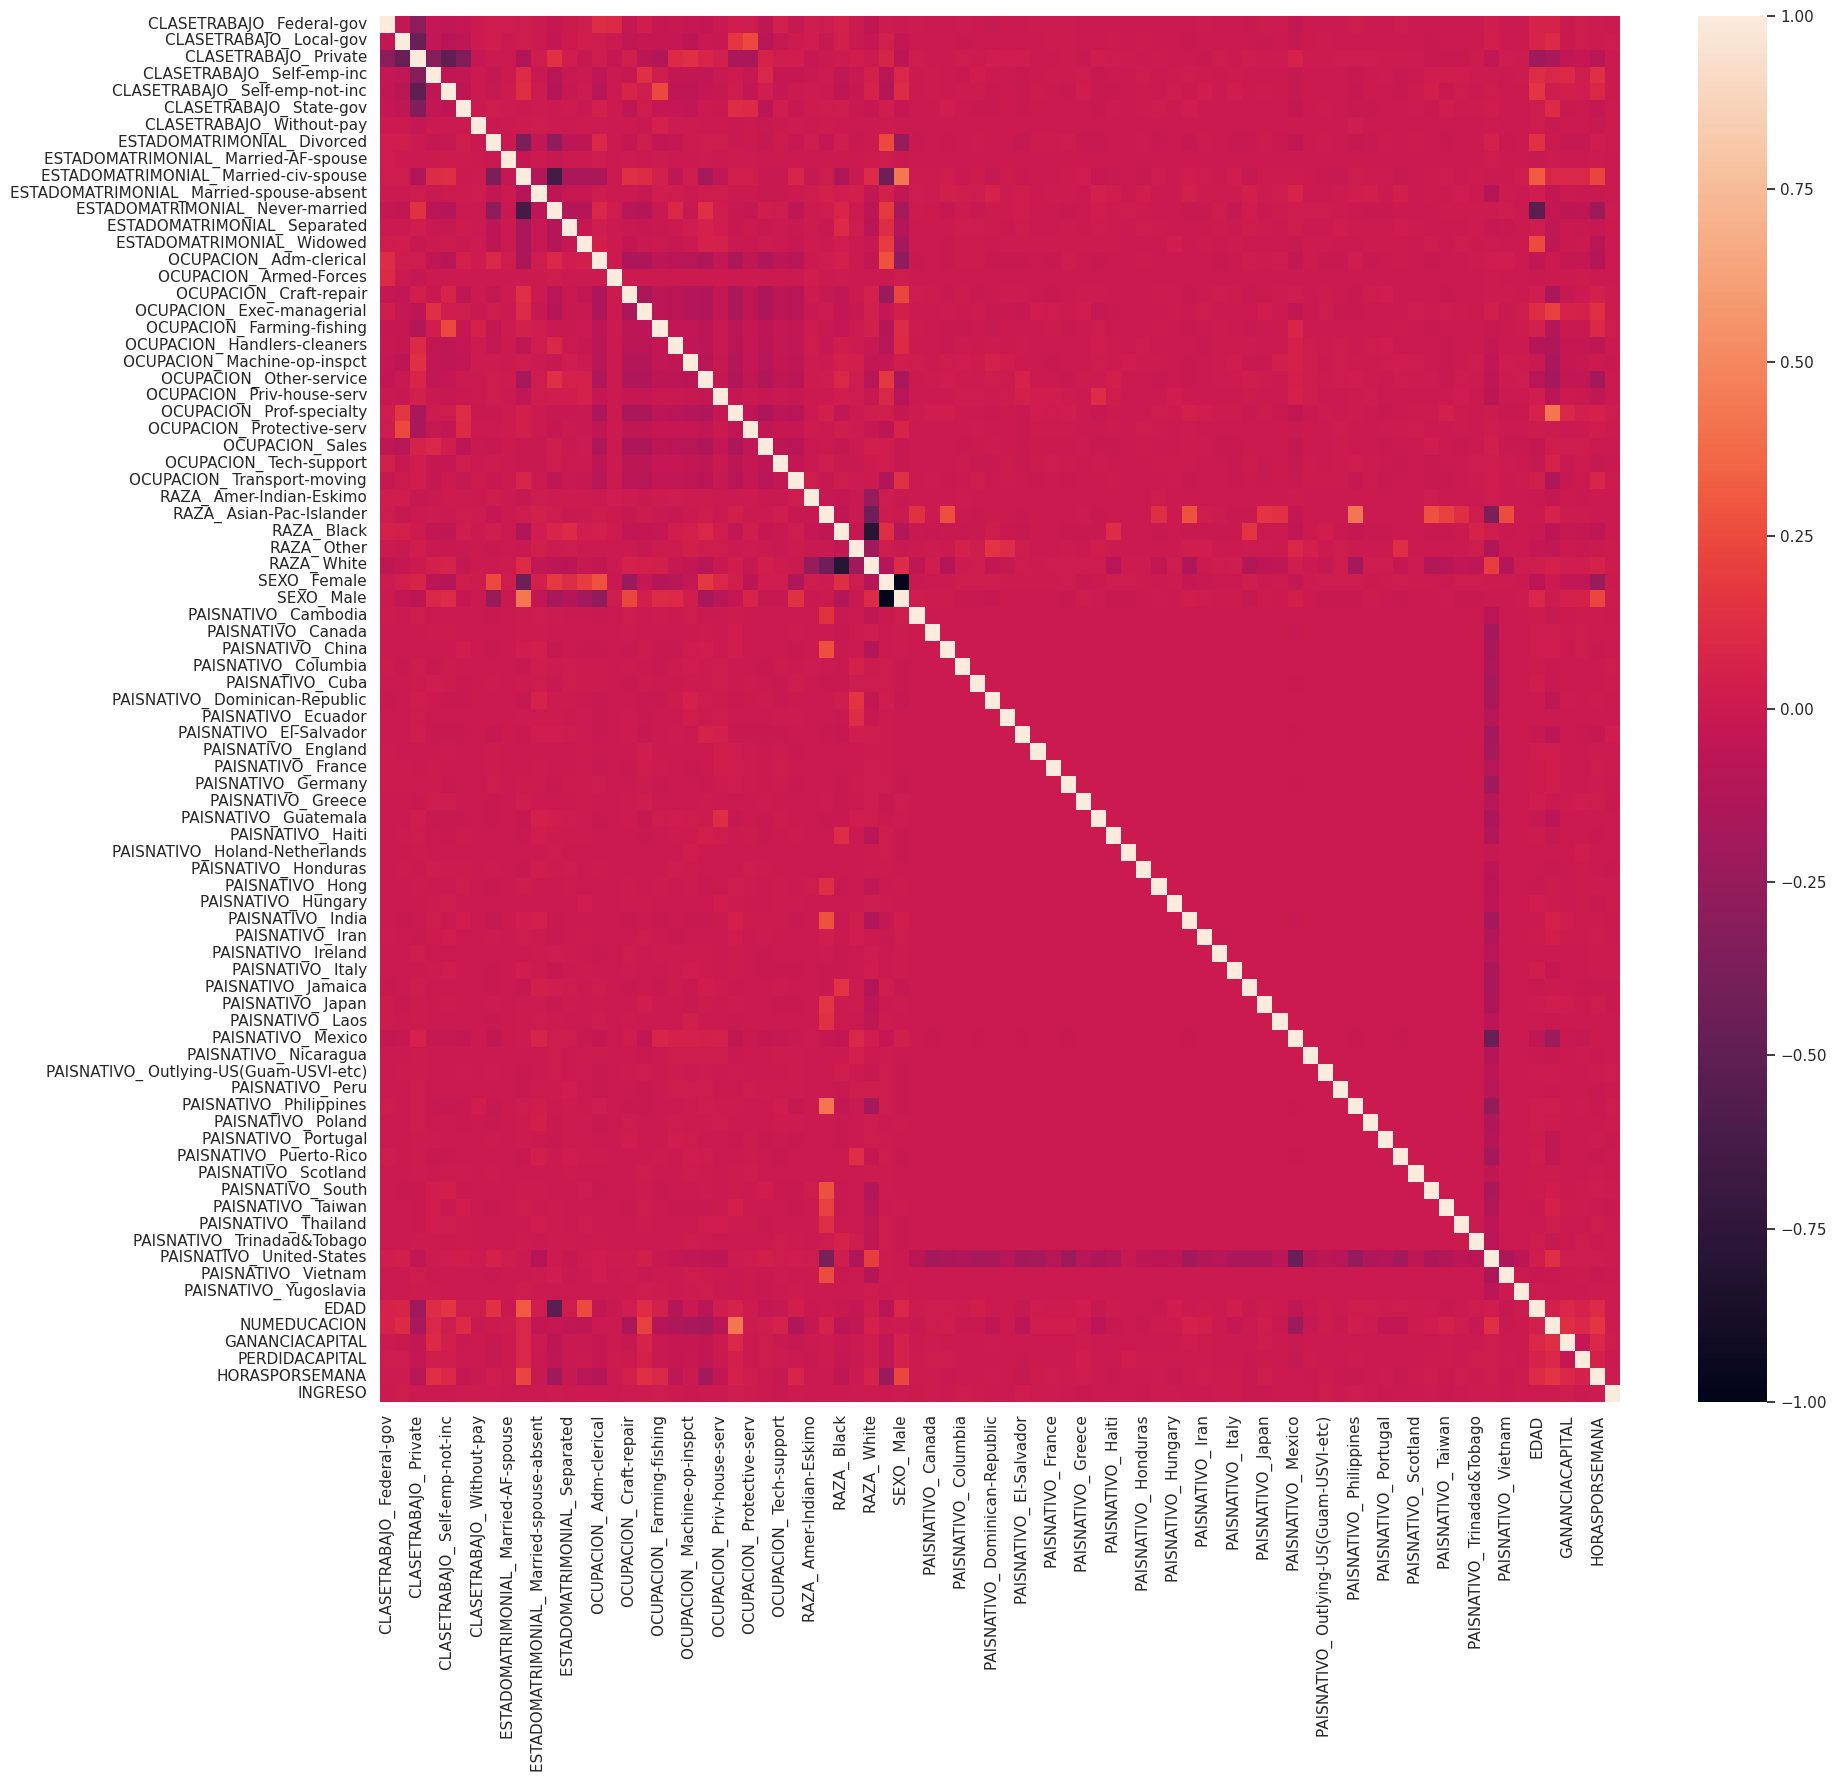

In [ ]:
plt.figure(figsize=(20, 18))  # Establecer el tamaño de la figura
sns.heatmap(dfCorrel)
plt.savefig('attribute_correlations.png')


<Axes: >

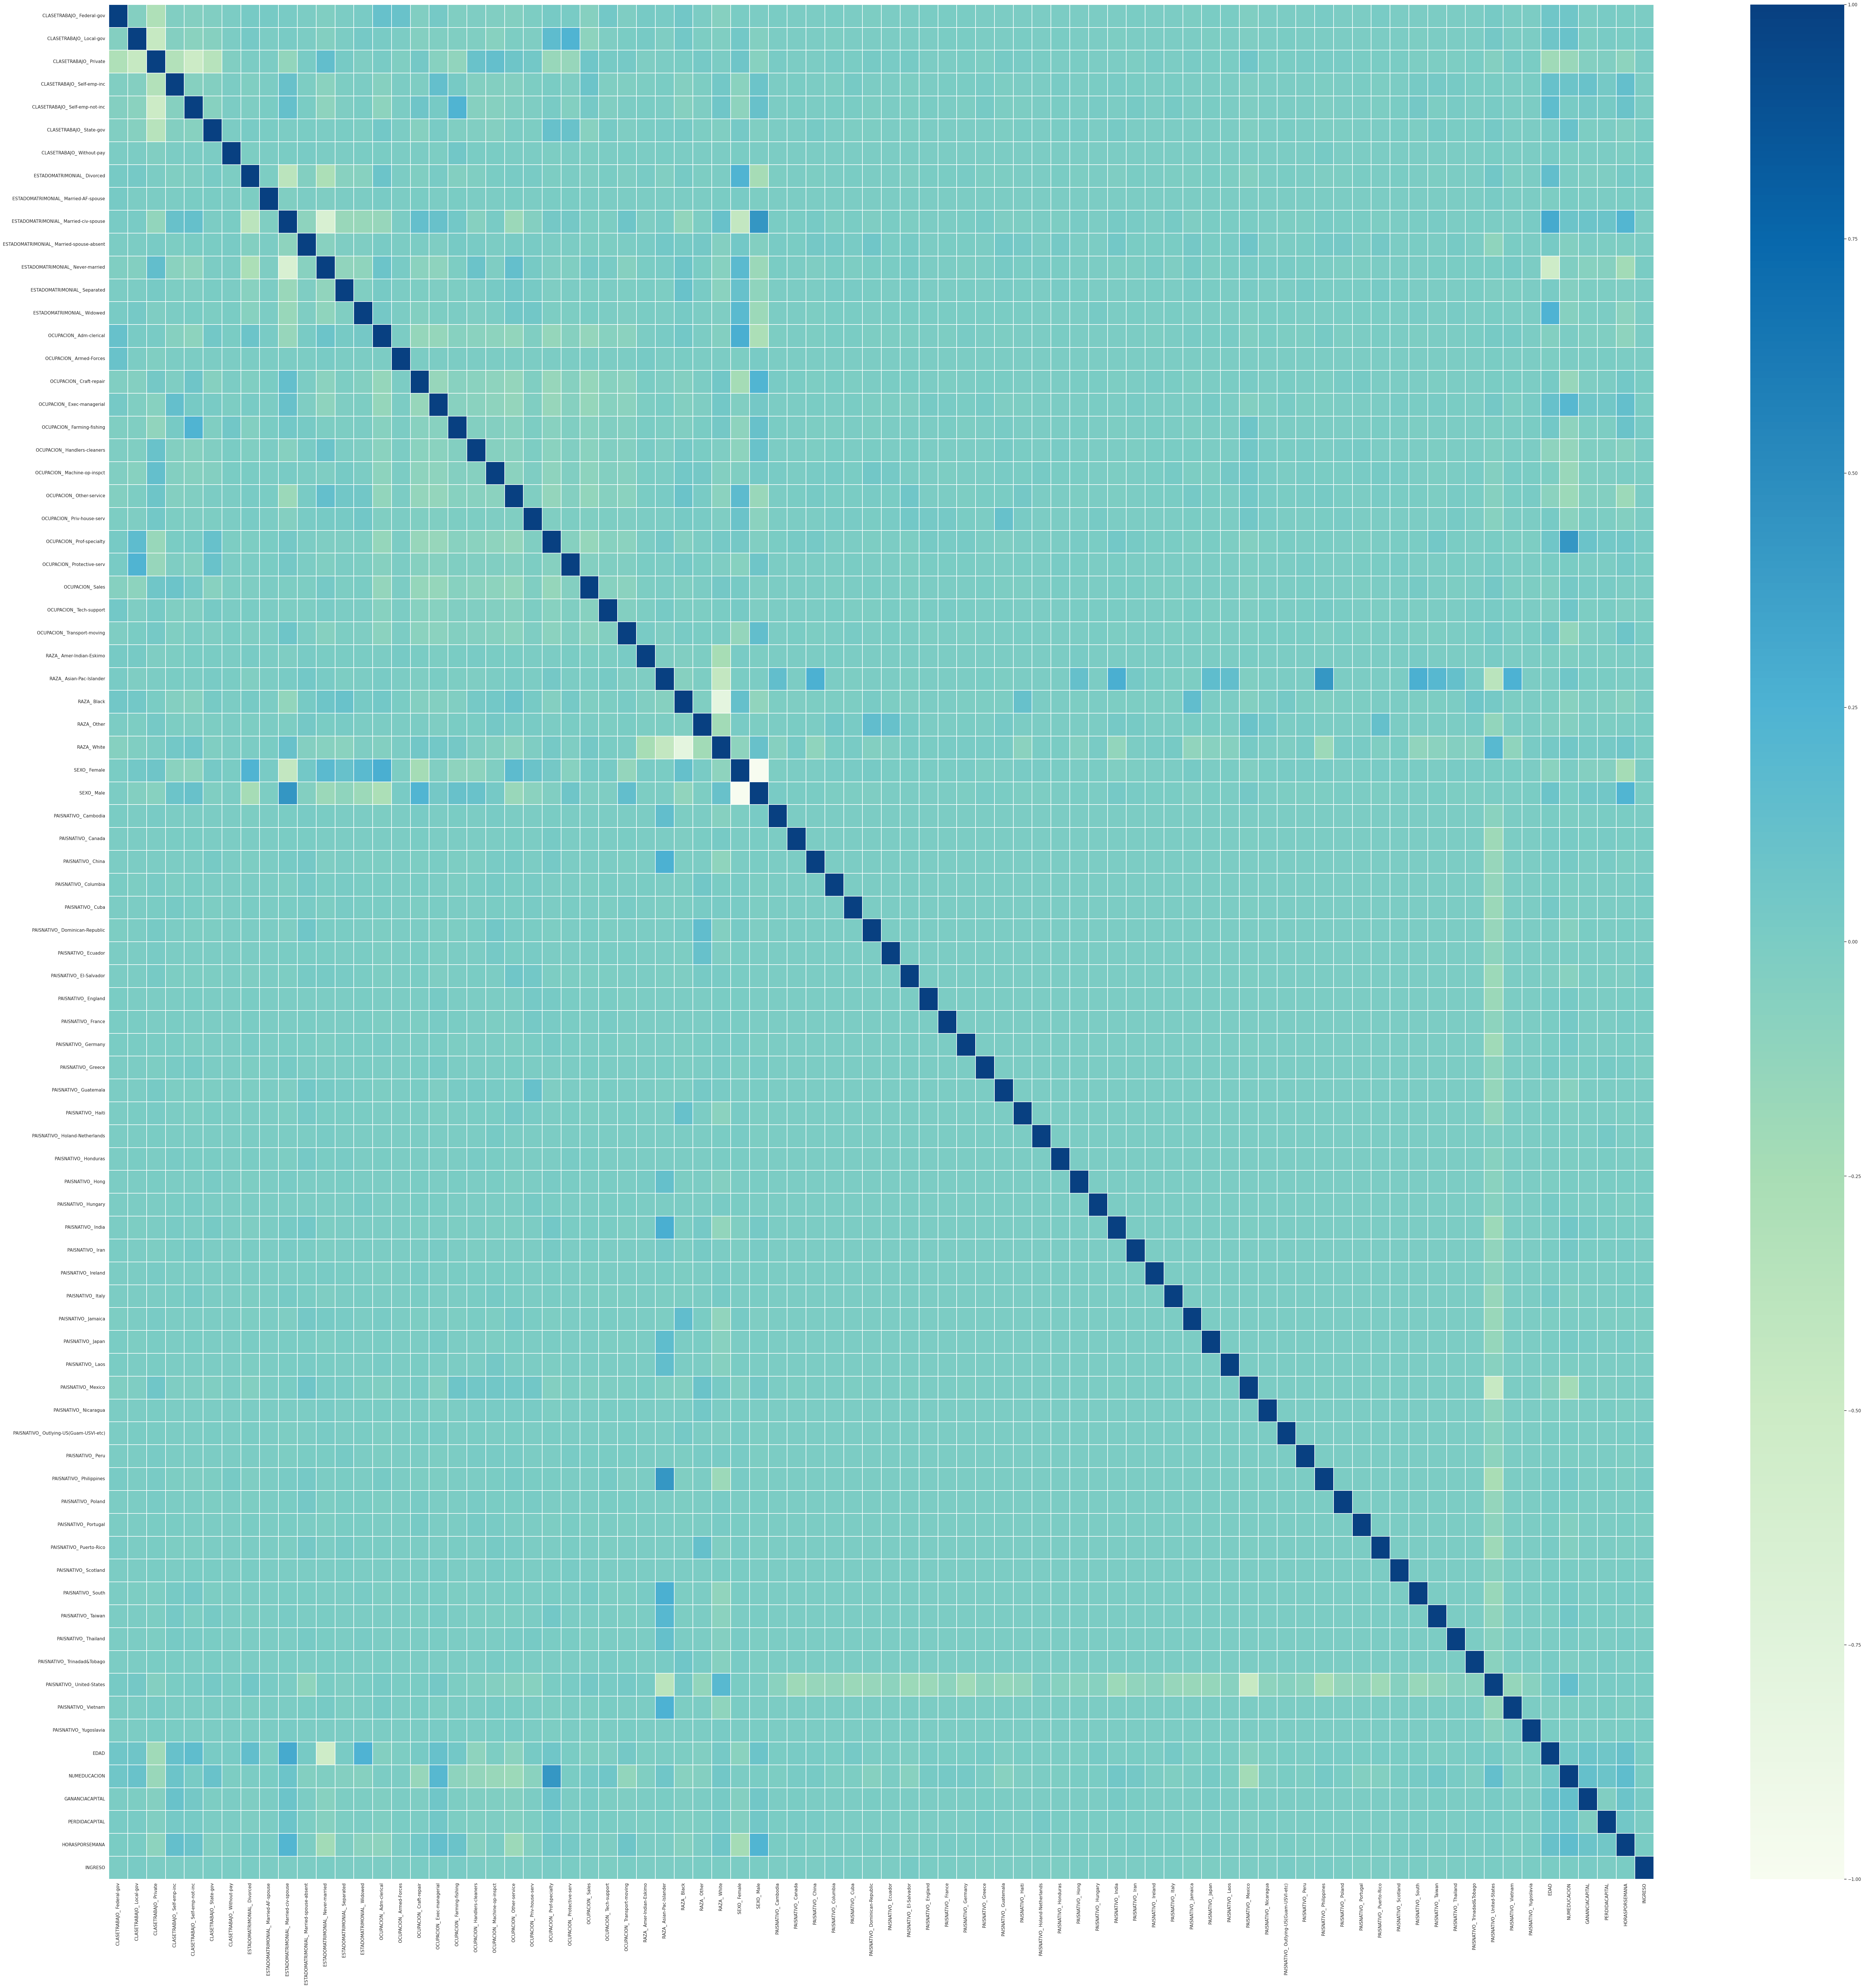

In [ ]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax = plt.subplots(figsize = (87, 85))
#sns.heatmap(cr, cmap ='viridis', linewidths = 0.03, annot = True)
sns.heatmap(dfCorrel, cmap ='GnBu', linewidths = 0.03, annot = False)

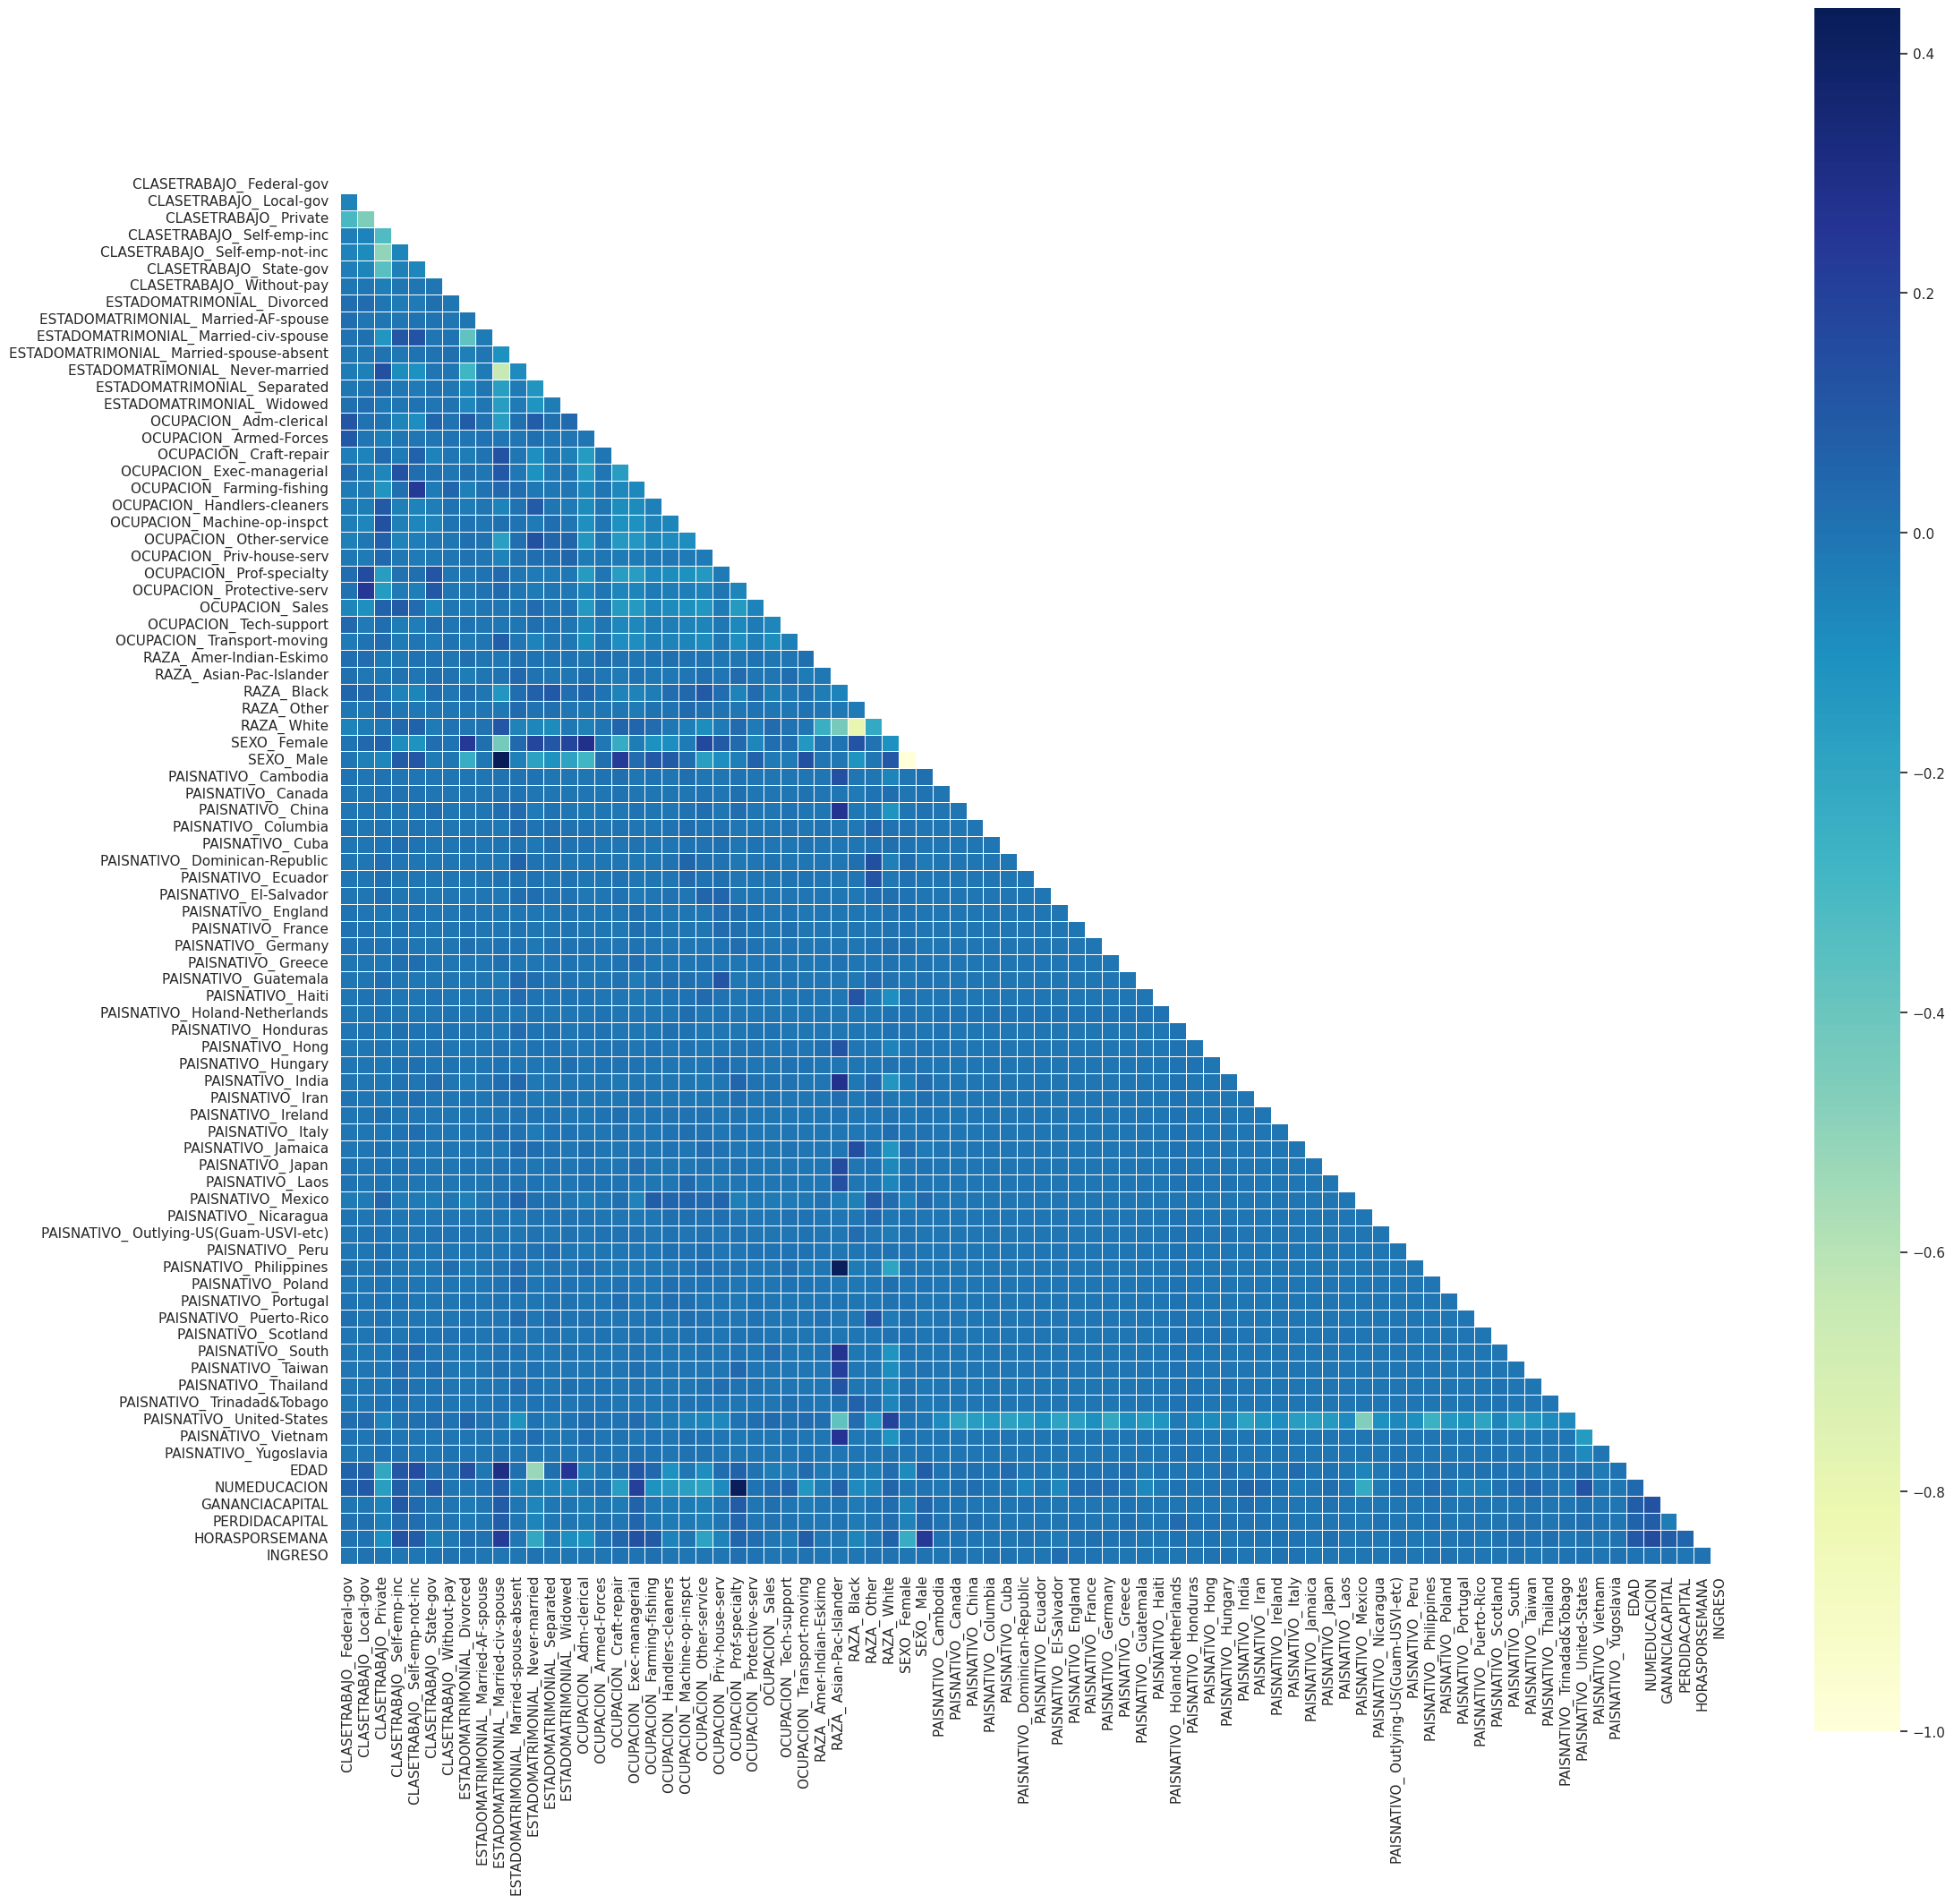

In [ ]:
#Un mapa de calor personalizado: colores, región inferior a la diagonal, tamaño
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 25))
    ax = sns.heatmap(dfCorrel, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
plt.savefig('attribute_correlations.png')

In [ ]:
#Análisis a partir de los valores: correlaciones positivas
dfCorrOrdenado2=dfCorrel.sort_values(by=['INGRESO'], ascending=False)
dfCorrOrdenado2['INGRESO'].head(10)

INGRESO                                   1.000000
PAISNATIVO_ El-Salvador                   0.018547
OCUPACION_ Farming-fishing                0.014162
OCUPACION_ Prof-specialty                 0.013659
PAISNATIVO_ Outlying-US(Guam-USVI-etc)    0.010668
PAISNATIVO_ Columbia                      0.010393
GANANCIACAPITAL                           0.009160
PAISNATIVO_ Philippines                   0.008846
CLASETRABAJO_ Local-gov                   0.008744
PAISNATIVO_ Ireland                       0.007517
Name: INGRESO, dtype: float64

Este análisis indica que dentro del conjunto de datos, la variable 'INGRESO' tiene correlaciones positivas más fuertes con factores como el país de origen ('PAISNATIVO'), específicamente con El Salvador, y ciertos tipos de ocupación como la agricultura y la pesca ('Farming-fishing') y profesiones especializadas ('Prof-specialty'). Estas correlaciones sugieren que estos factores están de alguna manera asociados con un ingreso mayor, aunque las correlaciones son relativamente bajas, indicando que la relación no es muy fuerte. Además, la presencia de varios países de origen indica que el ingreso puede variar significativamente con la demografía y el tipo de empleo dentro de la población estudiada.

In [ ]:
#Análisis a partir de los valores: correlaciones negativas
dfCorrOrdenado2=dfCorrel.sort_values(by=['INGRESO'], ascending=True)
dfCorrOrdenado2['INGRESO'].head(10)

PAISNATIVO_ Jamaica            -0.012166
OCUPACION_ Tech-support        -0.011527
PAISNATIVO_ Greece             -0.010325
PAISNATIVO_ Taiwan             -0.009943
OCUPACION_ Machine-op-inspct   -0.009579
PAISNATIVO_ Portugal           -0.009176
PAISNATIVO_ Japan              -0.009052
PAISNATIVO_ Honduras           -0.007900
OCUPACION_ Adm-clerical        -0.007488
CLASETRABAJO_ Federal-gov      -0.007368
Name: INGRESO, dtype: float64

En este analisis se muestran las correlaciones negativas más fuertes con la variable 'INGRESO'. El país de origen, específicamente Jamaica, y algunos tipos de ocupación como el soporte técnico y operadores de máquinas, tienen las correlaciones negativas más significativas. Esto sugiere que las personas de Jamaica o aquellos que trabajan en estas ocupaciones específicas tienden a tener ingresos más bajos dentro de este conjunto de datos. Sin embargo, es importante notar que las correlaciones siguen siendo bastante bajas, por lo que las relaciones no son extremadamente fuertes.

In [ ]:
#Análisis a partir de los valores: correlaciones positivas
dfCorrOrdenado2=dfCorrel.sort_values(by=['HORASPORSEMANA'], ascending=False)
dfCorrOrdenado2['HORASPORSEMANA'].head(10)

HORASPORSEMANA                           1.000000
SEXO_ Male                               0.231268
ESTADOMATRIMONIAL_ Married-civ-spouse    0.223621
NUMEDUCACION                             0.152522
OCUPACION_ Exec-managerial               0.131572
CLASETRABAJO_ Self-emp-inc               0.126254
EDAD                                     0.101599
OCUPACION_ Farming-fishing               0.093134
CLASETRABAJO_ Self-emp-not-inc           0.087835
GANANCIACAPITAL                          0.080432
Name: HORASPORSEMANA, dtype: float64

Estos datos tiene las correlaciones negativas más fuertes con la variable 'HORASPORSEMANA'. Ser mujer, estar soltero o viudo, y trabajar en ciertos tipos de empleo, como servicios, administración o limpieza, están negativamente correlacionados con la cantidad de horas trabajadas por semana. Esto podría indicar que estas categorías tienden a trabajar menos horas en comparación con sus contrapartes. También se destaca que trabajadores del sector privado y del gobierno estatal generalmente trabajan menos horas. La presencia de la raza como una variable correlacionada sugiere diferencias en las horas de trabajo entre distintos grupos raciales, específicamente para personas negras en este conjunto de datos.

In [ ]:
#Análisis a partir de los valores: correlaciones negativas
dfCorrOrdenado2=dfCorrel.sort_values(by=['HORASPORSEMANA'], ascending=True)
dfCorrOrdenado2['HORASPORSEMANA'].head(10)

SEXO_ Female                       -0.231268
ESTADOMATRIMONIAL_ Never-married   -0.212803
OCUPACION_ Other-service           -0.182292
OCUPACION_ Adm-clerical            -0.105524
CLASETRABAJO_ Private              -0.095533
ESTADOMATRIMONIAL_ Widowed         -0.091231
RAZA_ Black                        -0.060463
OCUPACION_ Handlers-cleaners       -0.055226
OCUPACION_ Priv-house-serv         -0.046863
CLASETRABAJO_ State-gov            -0.032976
Name: HORASPORSEMANA, dtype: float64

Aqui se listan las correlaciones negativas más fuertes con las horas trabajadas por semana. Las mujeres y las personas que nunca se han casado o están viudas muestran una tendencia a trabajar menos horas. Ciertas ocupaciones, como las de servicios varios, administración y limpieza, también están asociadas con jornadas laborales más cortas. Además, los trabajadores del sector privado y del gobierno estatal parecen tener horarios más reducidos.  
La raza también aparece como una variable, con personas de raza negra trabajando menos horas en promedio. Esto resalta diferencias en la carga laboral que podrían reflejar desigualdades en el mercado de trabajo o en las oportunidades laborales para estos grupos.

# Segmentación de datos

In [ ]:
dataframe=dataframeTransformado[['EDAD','NUMEDUCACION','GANANCIACAPITAL','PERDIDACAPITAL', 'HORASPORSEMANA']]
print(dataframe.shape)
dataframe.head(50)

(32368, 5)


EDAD  NUMEDUCACION  GANANCIACAPITAL  PERDIDACAPITAL  HORASPORSEMANA
0   0.301370      0.800000         0.021740        0.000000        0.397959
1   0.452055      0.800000         0.000000        0.000000        0.122449
2   0.287671      0.533333         0.000000        0.000000        0.397959
3   0.493151      0.400000         0.000000        0.000000        0.397959
4   0.150685      0.800000         0.000000        0.000000        0.397959
5   0.273973      0.866667         0.000000        0.000000        0.397959
6   0.438356      0.266667         0.000000        0.000000        0.153061
7   0.479452      0.533333         0.000000        0.000000        0.448980
8   0.191781      0.866667         0.140841        0.000000        0.500000
9   0.342466      0.800000         0.051781        0.000000        0.397959
10  0.273973      0.600000         0.000000        0.000000        0.806122
11  0.178082      0.800000         0.000000        0.000000        0.397959
12  0.082192      0.800000         0.000000        0.000000        0.295918
13  0.205479      0.733333         0.000000        0.000000        0.500000
14  0.232877      0.200000         0.000000        0.000000        0.448980
15  0.109589      0.533333         0.000000        0.000000        0.346939
16  0.205479      0.533333         0.000000        0.000000        0.397959
17  0.287671      0.400000         0.000000        0.000000        0.500000
18  0.356164      0.866667         0.000000        0.000000        0.448980
19  0.315068      1.000000         0.000000        0.000000        0.602041
20  0.506849      0.533333         0.000000        0.000000        0.193878
21  0.246575      0.266667         0.000000        0.000000        0.397959
22  0.356164      0.400000         0.000000        0.468779        0.397959
23  0.575342      0.533333         0.000000        0.000000        0.397959
24  0.534247      0.800000         0.000000        0.000000        0.397959
25  0.027397      0.533333         0.000000        0.000000        0.397959
26  0.301370      0.533333         0.000000        0.000000        0.806122
27  0.438356      0.533333         0.000000        0.000000        0.397959
28  0.082192      0.733333         0.000000        0.000000        0.520408
29  0.041096      0.600000         0.000000        0.000000        0.438776
30  0.383562      0.800000         0.000000        0.323232        0.397959
31  0.178082      0.600000         0.000000        0.000000        0.397959
32  0.068493      0.600000         0.000000        0.000000        0.142857
33  0.424658      0.400000         0.000000        0.000000        0.397959
34  0.054795      0.600000         0.000000        0.000000        0.397959
35  0.027397      0.533333         0.000000        0.000000        0.244898
36  0.424658      0.733333         0.000000        0.000000        0.397959
37  0.191781      0.266667         0.000000        0.000000        0.428571
38  0.493151      0.800000         0.000000        0.000000        0.397959
39  0.095890      0.800000         0.000000        0.000000        0.500000
40  0.438356      0.533333         0.000000        0.000000        0.397959
41  0.109589      0.533333         0.000000        0.000000        0.346939
42  0.547945      0.800000         0.000000        0.000000        0.397959
43  0.493151      0.533333         0.000000        0.000000        0.377551
44  0.369863      0.866667         0.000000        0.000000        0.397959
45  0.328767      0.666667         0.000000        0.000000        0.397959
46  0.164384      0.666667         0.000000        0.000000        0.428571
47  0.109589      0.600000         0.000000        0.000000        0.397959
48  0.410959      0.933333         0.000000        0.436639        0.602041
49  0.452055      0.800000         0.000000        0.000000        0.551020

In [ ]:
#Ordenar por alguna variable
#Continuar a partir del dataframe con las variables más relevantes (dataframe) o desde el dataframe sin outliers (df_filtrado)
dataframeTratamiento=dataframeTransformado.sort_values(by=['EDAD'])
print(dataframeTratamiento.shape)
dataframeTratamiento.head(50)

(32368, 82)


CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  \
9407                         0.0                      0.0   
20165                        0.0                      0.0   
13628                        0.0                      0.0   
12326                        0.0                      0.0   
24176                        0.0                      0.0   
9515                         0.0                      0.0   
5328                         0.0                      0.0   
10808                        0.0                      0.0   
5347                         0.0                      0.0   
24899                        0.0                      0.0   
24178                        0.0                      0.0   
24901                        1.0                      0.0   
8178                         0.0                      0.0   
2569                         0.0                      0.0   
27501                        0.0                      0.0   
23837                        0.0                      0.0   
13689                        0.0                      0.0   
3320                         0.0                      0.0   
21677                        0.0                      0.0   
3307                         0.0                      0.0   
27760                        0.0                      0.0   
27758                        0.0                      0.0   
4543                         0.0                      1.0   
1884                         0.0                      0.0   
1357                         0.0                      0.0   
440                          0.0                      0.0   
22932                        0.0                      0.0   
16743                        0.0                      0.0   
18189                        0.0                      0.0   
28568                        0.0                      0.0   
527                          0.0                      0.0   
27510                        0.0                      0.0   
22080                        0.0                      0.0   
24843                        0.0                      0.0   
622                          0.0                      0.0   
7332                         0.0                      0.0   
618                          0.0                      0.0   
8999                         0.0                      0.0   
22623                        0.0                      0.0   
23885                        0.0                      0.0   
1275                         0.0                      0.0   
23194                        0.0                      0.0   
23191                        0.0                      0.0   
18443                        0.0                      0.0   
25725                        0.0                      0.0   
20829                        0.0                      0.0   
15175                        0.0                      0.0   
22610                        0.0                      0.0   
10765                        0.0                      0.0   
559                          0.0                      0.0   

       CLASETRABAJO_ Private  CLASETRABAJO_ Self-emp-inc  \
9407                     1.0                         0.0   
20165                    1.0                         0.0   
13628                    1.0                         0.0   
12326                    1.0                         0.0   
24176                    1.0                         0.0   
9515                     1.0                         0.0   
5328                     1.0                         0.0   
10808                    1.0                         0.0   
5347                     1.0                         0.0   
24899                    1.0                         0.0   
24178                    0.0                         0.0   
24901                    0.0                         0.0   
8178                     1.0                         0.0   
2569                     1.0                         0.


El conjunto de datos han sido ordenados en función de la variable 'EDAD' y se ha creado un nuevo DataFrame llamado 'dataframeTratamiento'. La visualización de las primeras cinco filas muestra una serie de variables en donde todas estan en formato binario como resultado del 'one-hot encoding', lo cual facilita la aplicación de algoritmos de aprendizaje automático que requieren entradas numéricas.

El DataFrame ha sido reducido para incluir únicamente cinco variables numéricas: 'EDAD', 'NUMEDUCACION', 'GANANCIACAPITAL', 'PERDIDACAPITAL' y 'HORASPORSEMANA'.  

Estas variables han sido normalizadas, como lo indican sus valores, que ahora varían entre 0 y 1, lo cual es un paso importante para muchos algoritmos de aprendizaje automático que funcionan mejor con características numéricas en la misma escala.  
El DataFrame mantiene un total de 32,368 observaciones, y la normalización de estas características esenciales permite un tratamiento y comparación equitativos en análisis posteriores.

In [ ]:
dataSegmentos=dataframeTransformado.groupby(['HORASPORSEMANA', 'EDAD'])
dataSegmentos=dataSegmentos.mean()#calcula la media de todas la variables para los clientes con el mismo plazo y edad
dataSegmentos.head(50)

CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  \
HORASPORSEMANA EDAD                                                           
0.000000       0.054795                   0.000000                      0.0   
               0.082192                   0.000000                      0.0   
               0.136986                   0.000000                      0.0   
               0.547945                   0.000000                      0.0   
               0.561644                   0.000000                      0.0   
               0.780822                   0.000000                      0.0   
               0.821918                   0.000000                      0.0   
0.010204       0.013699                   0.000000                      0.0   
               0.041096                   0.000000                      0.0   
               0.095890                   0.000000                      1.0   
               0.136986                   0.000000                      0.0   
               0.205479                   0.000000                      0.0   
               0.260274                   0.000000                      0.0   
               0.315068                   0.000000                      0.0   
               0.410959                   0.000000                      0.0   
               0.452055                   0.000000                      0.0   
               0.684932                   0.000000                      0.0   
               0.739726                   0.000000                      0.0   
               0.890411                   0.000000                      0.0   
0.020408       0.013699                   0.000000                      0.0   
               0.027397                   0.000000                      0.0   
               0.068493                   0.000000                      0.0   
               0.123288                   0.000000                      0.0   
               0.191781                   0.000000                      0.0   
               0.260274                   0.000000                      0.0   
               0.369863                   0.000000                      0.0   
               0.383562                   0.000000                      0.0   
               0.547945                   0.000000                      0.0   
               0.602740                   0.000000                      0.0   
               0.630137                   0.000000                      0.0   
               0.643836                   0.000000                      0.0   
               0.671233                   0.000000                      0.0   
               0.712329                   0.000000                      0.0   
               0.726027                   0.000000                      0.0   
               0.794521                   0.000000                      0.0   
               0.835616                   0.000000                      0.0   
               0.876712                   0.000000                      0.0   
               0.931507                   0.000000                      0.0   
0.030612       0.000000                   0.000000                      0.0   
               0.013699                   0.333333                      0.0   
               0.027397                   0.000000                      0.0   
               0.041096                   0.000000                      0.0   
               0.054795                   0.000000                      0.5   
               0.068493                   0.000000                      0.0   
               0.123288                   0.000000                      0.0   
               0.150685                   0.000000                      0.0   
               0.219178                   0.000000                      0.0   
               0.260274                   0.000000                      0.0   
               0.301370                   0.000000                      0.0

Este método de segmentación permite analizar las características comunes dentro de grupos específicos definidos por la cantidad de horas trabajadas a la semana y la edad. Así, interpretamos cómo varían factores como la clase de trabajo o el estado civil en función de estas dos variables clave.

In [ ]:
dataSegmentos=dataSegmentos.groupby('HORASPORSEMANA')
dataSegmentos.head(2)

CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  \
HORASPORSEMANA EDAD                                                           
0.000000       0.054795                        0.0                      0.0   
               0.082192                        0.0                      0.0   
0.010204       0.013699                        0.0                      0.0   
               0.041096                        0.0                      0.0   
0.020408       0.013699                        0.0                      0.0   
...                                            ...                      ...   
0.979592       0.191781                        0.0                      1.0   
0.989796       0.054795                        0.0                      0.0   
               0.068493                        0.0                      0.0   
1.000000       0.027397                        0.0                      0.0   
               0.095890                        0.0                      0.0   

                         CLASETRABAJO_ Private  CLASETRABAJO_ Self-emp-inc  \
HORASPORSEMANA EDAD                                                          
0.000000       0.054795                    1.0                         0.0   
               0.082192                    1.0                         0.0   
0.010204       0.013699                    1.0                         0.0   
               0.041096                    1.0                         0.0   
0.020408       0.013699                    1.0                         0.0   
...                                        ...                         ...   
0.979592       0.191781                    0.0                         0.0   
0.989796       0.054795                    0.0                         0.0   
               0.068493                    1.0                         0.0   
1.000000       0.027397                    1.0                         0.0   
               0.095890                    0.0                         0.0   

                         CLASETRABAJO_ Self-emp-not-inc  \
HORASPORSEMANA EDAD                                       
0.000000       0.054795                             0.0   
               0.082192                             0.0   
0.010204       0.013699                             0.0   
               0.041096                             0.0   
0.020408       0.013699                             0.0   
...                                                 ...   
0.979592       0.191781                             0.0   
0.989796       0.054795                             1.0   
               0.068493                             0.0   
1.000000       0.027397                             0.0   
               0.095890                             0.0   

                         CLASETRABAJO_ State-gov  CLASETRABAJO_ Without-pay  \
HORASPORSEMANA EDAD                                                           
0.000000       0.054795                      0.0                        0.0   
               0.082192                      0.0                        0.0   
0.010204       0.013699                      0.0                        0.0   
               0.041096                      0.0                        0.0   
0.020408       0.013699                      0.0                        0.0   
...                                          ...                        ...   
0.979592       0.191781                      0.0                        0.0   
0.989796       0.054795                      0.0                        0.0   
               0.068493                      0.0                        0.0   
1.000000       0.027397                      0.0                        0.0   
               0.095890                      1.0                        0.0   

                         ESTADOMATRIMONIAL_ Divorced  \
HORASPORSEMANA EDAD                                    
0.000000       0.054795                          0.0   
               0.0


La tabla muestra diferentes segmentos de datos con variaciones en la 'EDAD'. Se observa cómo estos atributos varían con respecto a las 'HORASPORSEMANA' trabajadas. Con esta llegamos a entender las tendencias y patrones de comportamiento dentro de diferentes grupos de horas de trabajo se puede identificar necesidades específicas de diferentes segmentos laborales.

# Analisis y eliminacion de outliers

In [ ]:
dataframe_scaled_minmax = pd.DataFrame(dataframeTransformado)
print(dataframe_scaled_minmax.shape)
dataframe_scaled_minmax.head()


(32368, 82)


CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  CLASETRABAJO_ Private  \
0                        0.0                      0.0                    0.0   
1                        0.0                      0.0                    0.0   
2                        0.0                      0.0                    1.0   
3                        0.0                      0.0                    1.0   
4                        0.0                      0.0                    1.0   

   CLASETRABAJO_ Self-emp-inc  CLASETRABAJO_ Self-emp-not-inc  \
0                         0.0                             0.0   
1                         0.0                             1.0   
2                         0.0                             0.0   
3                         0.0                             0.0   
4                         0.0                             0.0   

   CLASETRABAJO_ State-gov  CLASETRABAJO_ Without-pay  \
0                      1.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
3                      0.0                        0.0   
4                      0.0                        0.0   

   ESTADOMATRIMONIAL_ Divorced  ESTADOMATRIMONIAL_ Married-AF-spouse  \
0                          0.0                                   0.0   
1                          0.0                                   0.0   
2                          1.0                                   0.0   
3                          0.0                                   0.0   
4                          0.0                                   0.0   

   ESTADOMATRIMONIAL_ Married-civ-spouse  ...  PAISNATIVO_ Trinadad&Tobago  \
0                                    0.0  ...                          0.0   
1                                    1.0  ...                          0.0   
2                                    0.0  ...                          0.0   
3                                    1.0  ...                          0.0   
4                                    1.0  ...                          0.0   

   PAISNATIVO_ United-States  PAISNATIVO_ Vietnam  PAISNATIVO_ Yugoslavia  \
0                        1.0                  0.0                     0.0   
1                        1.0                  0.0                     0.0   
2                        1.0                  0.0                     0.0   
3                        1.0                  0.0                     0.0   
4                        0.0                  0.0                     0.0   

       EDAD  NUMEDUCACION  GANANCIACAPITAL  PERDIDACAPITAL  HORASPORSEMANA  \
0  0.301370      0.800000          0.02174             0.0        0.397959   
1  0.452055      0.800000          0.00000             0.0        0.122449   
2  0.287671      0.533333          0.00000             0.0        0.397959   
3  0.493151      0.400000          0.00000             0.0        0.397959   
4  0.150685      0.800000          0.00000             0.0        0.397959   

   INGRESO  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 82 columns]

In [ ]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Genera datos de ejemplo (reemplaza esto con tus propios datos)
#np.random.seed(0)
#data = np.random.rand(100, 3)
#np.random.rand(200)

# Selecciona las tres columnas que deseas convertir
columnas_seleccionadas = dataframe_scaled_minmax[['EDAD', 'NUMEDUCACION', 'GANANCIACAPITAL']]

# Convierte las columnas seleccionadas en un numpy.ndarray
data = columnas_seleccionadas.to_numpy()

# Define un umbral (de distancia euclidiana) para identificar outliers (puedes ajustar esto según tus necesidades)
umbral = 1.2

# Calcula la distancia euclidiana desde el origen (centro) para cada punto de datos
distancias = np.linalg.norm(data, axis=1)

# Identifica los índices de los outliers
outliers_indices = np.where(distancias > umbral)[0]

# Separa los datos en dos grupos: puntos normales y outliers
puntos_normales = data[distancias <= umbral]
outliers = data[outliers_indices]

# Crea una figura 3D interactiva
fig = go.Figure()

# Plotea los puntos de datos normales (dentro de la esfera)
fig.add_trace(go.Scatter3d(
    x=puntos_normales[:, 0],
    y=puntos_normales[:, 1],
    z=puntos_normales[:, 2],
    mode='markers',
    marker={'color':'blue', 'size':4},
    name='Puntos Normales'
))

# Plotea los outliers (fuera de la esfera)
fig.add_trace(go.Scatter3d(
    x=outliers[:, 0],
    y=outliers[:, 1],
    z=outliers[:, 2],
    mode='markers',
    marker={'color':'red', 'size':4},
    name='Outliers'
))

# Crea una esfera que excluye los outliers
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = umbral * np.outer(np.cos(u), np.sin(v))
y = umbral * np.outer(np.sin(u), np.sin(v))
z = umbral * np.outer(np.ones_like(u), np.cos(v))

fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='greens', opacity=0.3, showscale=False, name='Esfera Umbral'))

# Configura el diseño de la figura
fig.update_layout(
    scene={
        'xaxis_title':'X: EDAD', #EJE X
        'yaxis_title':'Y: NUMEDUCACION', #EJE Y
        'zaxis_title':'Z: GANANCIACAPITAL' #EJE Z
    },
    scene_camera={
        'center':{'x':0, 'y':0, 'z':0},
        'eye':{'x':1.25, 'y':1.25, 'z':1.25}
    }
)
# Guarda la figura interactica
fig.write_html("grafico_interactivo.html")

# Muestra la figura interactiva
fig.show()

In [ ]:
# Calcular la distancia al origen para cada muestra
dataframe_scaled_minmax['DIST'] = np.sqrt(dataframe_scaled_minmax['EDAD']**2 + dataframe_scaled_minmax['NUMEDUCACION']**2 + dataframe_scaled_minmax['GANANCIACAPITAL']**2)
# Filtrar el DataFrame para obtener solo las muestras dentro de la esfera
df_filtrado = dataframe_scaled_minmax[dataframe_scaled_minmax['DIST'] <= umbral]
df_filtrado = df_filtrado.drop(['DIST'], axis=1)
#Guardar el dataset
df_filtrado.to_csv("DatasetNormalizadoyFiltrado.csv", sep=";",index = False)
print(df_filtrado.shape)
df_filtrado.head(20)

(29976, 82)


CLASETRABAJO_ Federal-gov  CLASETRABAJO_ Local-gov  CLASETRABAJO_ Private  \
0                         0.0                      0.0                    0.0   
1                         0.0                      0.0                    0.0   
2                         0.0                      0.0                    1.0   
3                         0.0                      0.0                    1.0   
4                         0.0                      0.0                    1.0   
5                         0.0                      0.0                    1.0   
6                         0.0                      0.0                    1.0   
7                         0.0                      0.0                    0.0   
8                         0.0                      0.0                    1.0   
9                         0.0                      0.0                    1.0   
10                        0.0                      0.0                    1.0   
11                        0.0                      0.0                    0.0   
12                        0.0                      0.0                    1.0   
13                        0.0                      0.0                    1.0   
14                        0.0                      0.0                    1.0   
15                        0.0                      0.0                    0.0   
16                        0.0                      0.0                    1.0   
17                        0.0                      0.0                    1.0   
18                        0.0                      0.0                    0.0   
19                        0.0                      0.0                    1.0   

    CLASETRABAJO_ Self-emp-inc  CLASETRABAJO_ Self-emp-not-inc  \
0                          0.0                             0.0   
1                          0.0                             1.0   
2                          0.0                             0.0   
3                          0.0                             0.0   
4                          0.0                             0.0   
5                          0.0                             0.0   
6                          0.0                             0.0   
7                          0.0                             1.0   
8                          0.0                             0.0   
9                          0.0                             0.0   
10                         0.0                             0.0   
11                         0.0                             0.0   
12                         0.0                             0.0   
13                         0.0                             0.0   
14                         0.0                             0.0   
15                         0.0                             1.0   
16                         0.0                             0.0   
17                         0.0                             0.0   
18                         0.0                             1.0   
19                         0.0                             0.0   

    CLASETRABAJO_ State-gov  CLASETRABAJO_ Without-pay  \
0                       1.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   
5                       0.0                        0.0   
6                       0.0                        0.0   
7                       0.0                        0.0   
8                       0.0                        0.0   
9                       0.0                        0.0   
10                      0.0                        0.0   
11                      1.0                        0.0   
12                      0.0                        0.0   
13                      0.0                        0.0   
14                      0.0                  

El código realiza un importante paso de limpieza en el análisis de datos del censo, específicamente en la identificación y eliminación de outliers basados en la distancia euclidiana en un espacio de características multidimensional. Se calcula la distancia para cada observación usando las variables normalizadas de edad, educación y horas trabajadas por semana, y se establece un umbral para determinar qué puntos son considerados outliers.  
Estos puntos son luego excluidos, reduciendo el conjunto de datos de 32,368 a 29,745 observaciones, lo que sugiere que un pequeño porcentaje de los datos originales han sido identificados como atípicos y removidos para garantizar la calidad del análisis.

In [ ]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Genera datos de ejemplo (reemplaza esto con tus propios datos)
#np.random.seed(0)
#data = np.random.rand(100, 3)
#np.random.rand(200)

# Selecciona las tres columnas que deseas convertir
columnas_seleccionadas = dataframe_scaled_minmax[['EDAD', 'NUMEDUCACION', 'HORASPORSEMANA']]

# Convierte las columnas seleccionadas en un numpy.ndarray
data = columnas_seleccionadas.to_numpy()

# Define un umbral (de distancia euclidiana) para identificar outliers (puedes ajustar esto según tus necesidades)
umbral = 1.2

# Calcula la distancia euclidiana desde el origen (centro) para cada punto de datos
distancias = np.linalg.norm(data, axis=1)

# Identifica los índices de los outliers
outliers_indices = np.where(distancias > umbral)[0]

# Separa los datos en dos grupos: puntos normales y outliers
puntos_normales = data[distancias <= umbral]
outliers = data[outliers_indices]

# Crea una figura 3D interactiva
fig = go.Figure()

# Plotea los puntos de datos normales (dentro de la esfera)
fig.add_trace(go.Scatter3d(
    x=puntos_normales[:, 0],
    y=puntos_normales[:, 1],
    z=puntos_normales[:, 2],
    mode='markers',
    marker={'color':'blue', 'size':4},
    name='Puntos Normales'
))

# Plotea los outliers (fuera de la esfera)
fig.add_trace(go.Scatter3d(
    x=outliers[:, 0],
    y=outliers[:, 1],
    z=outliers[:, 2],
    mode='markers',
    marker={'color':'red', 'size':4},
    name='Outliers'
))

# Crea una esfera que excluye los outliers
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = umbral * np.outer(np.cos(u), np.sin(v))
y = umbral * np.outer(np.sin(u), np.sin(v))
z = umbral * np.outer(np.ones_like(u), np.cos(v))

fig.add_trace(go.Surface(x=x, y=y, z=z, colorscale='greens', opacity=0.3, showscale=False, name='Esfera Umbral'))

# Configura el diseño de la figura
fig.update_layout(
    scene={
        'xaxis_title':'X: EDAD', #EJE X
        'yaxis_title':'Y: NUMEDUCACION', #EJE Y
        'zaxis_title':'Z: HORASPORSEMANA' #EJE Z
    },
    scene_camera={
        'center':{'x':0, 'y':0, 'z':0},
        'eye':{'x':1.25, 'y':1.25, 'z':1.25}
    }
)
# Guarda la figura interactica
fig.write_html("grafico_interactivo2.html")

# Muestra la figura interactiva
fig.show()

# **Generación de Hipótesis:**

Con base en la exploración del conjunto de datos delo dataset de censo, se pueden formular varias hipótesis iniciales sobre las relaciones y patrones que podrían investigarse más a fondo:

* **Hipótesis sobre educación y ganancias:** Existe una relación positiva entre el nivel de educación y el ingreso. Aquellos con niveles educativos más altos tienden a tener mayores ingresos. Explorar cómo la educación continua, como la obtención de títulos avanzados o la participación en programas de formación profesional, influye en los ingresos a lo largo del tiempo; Examinar cómo la calidad de la educación, medida por indicadores como la reputación de la institución educativa o el rendimiento académico, afecta los ingresos.
* **Hipótesis sobre el estado civil y las horas de trabajo:** Es posible que los individuos casados tiendan a trabajar más horas por semana que aquellos que no lo están, ya sea por necesidades económicas o por responsabilidades familiares. Evaluar si existen diferencias en las horas de trabajo entre personas divorciadas, separadas y viudas en comparación con aquellas que están casadas.
* **Hipótesis sobre la relación entre sexo y ganancias:**  Existe la posibilidad de que exista una disparidad de ingresos entre géneros, donde los hombres tienden a tener mayores ingresos en promedio que las mujeres. Explorar cómo factores como la segregación ocupacional por género y la brecha de género en el acceso a puestos de liderazgo afectan los ingresos. Evaluar cómo políticas específicas, como las políticas de igualdad de género en el lugar de trabajo o las leyes de igualdad salarial, influyen en la reducción de la brecha salarial de género a lo largo del tiempo.

# **Conclusiones/Presentación de Resultados**

###1.  **Carga de Datos:**
Dentro de la carga de datos se tiene lo siguiente:

* **Nombre del dataset:** Census Income. Enlace: https://archive.ics.uci.edu/dataset/20/census+income [1]

* **Descripción General:** El conjunto de datos "Census Income" contiene los datos de cada persona censada en Estados Unidos del año 1994, contiene 32561 registros de personas con 14 características cada uno, utilizado para predecir si un individuo gana más de 50,000 dólares al año.

* **Número de Variables (o atributos):** 15

* **Número de Instancias (personas censadas):** 32561

* **Salida/Variable de Estudio (Y):** INGRESO (>50K:1, <=50k:2)

###2.**Conclusiones del Resumen Estadístico**
La población media tiene una edad relativamente cercana a los 40 años. La edad minima es de  17 años, sugiere una diversidad generacional en la población.
La 90 años, población incluye a personas mayores, algunas de las cuales pueden estar jubiladas o en edad avanzada.
La desviación estándar de la edad es de aproximadamente 13.64, lo que sugiere una dispersión relativamente amplia de las edades en torno a la media. La gente en promedio ha estudiado hasta un nivel que supera la secundaria. Aunque la mayoría no tiene ni ganancias ni pérdidas significativas de capital, algunos números muy altos podrían indicar casos especiales o errores.  La mayoría trabaja unas 40 horas a la semana, que es lo habitual, pero hay variaciones que sugieren que algunos trabajan menos horas y otras personas que trabajan más.

### **Figuras más relevantes de la Visualizacion de Datos**
Dentro de la visualizacion de Datos encontramos varias graficas que nos indican las variaciones, las más relevantes en nuestra opinion con:
*  Diagrama de barras mostrando la distribución de ingresos, la mayoría de las personas en la grafica, nos muestra que ganan 50,000 dólares o menos, lo que indica que este es el grupo más común en el conjunto de datos. El grupo que gana más de 50,000 dólares es considerablemente más pequeño, ya que hay menos personas que alcanzan este nivel de ingreso.
*  Diagrama de barras de la distribución de edades, la grafica nos muestra la distribución de edades de las personas, con la mayoría concentrada entre los 20 y 50 años.
Hay un pico notable en la frecuencia de personas en sus 30 y 40 años, indicando que esta es la franja de edad más común.
La cantidad disminuye progresivamente a medida que la edad aumenta, lo que sugiere que hay menos personas en el conjunto de datos que pertenecen a los grupos de mayores de edad.
* Diagrama de barras mostrando la distribución de niveles de educacion y su relacion de comparación de numeducacion, los niveles con mayor frecuencia son el secundario o como en la grafica se encuentra (HS-grad), seguido por algunos estudios universitarios (some-college) y la licenciatura (Bachelors).
Los grados avanzados como maestría (Masters) y doctorado (Doctorate) son menos comunes.
Esto sugiere que la mayoría de las personas en la muestra han completado la educación secundaria y que hay un número significativo con educación superior, aunque los niveles de posgrado son menos frecuentes.
Las posibilidades que tiene cada uno dentro de su area de trabajo al tener mayor o menos estudios, lo que esto podria influenciar en que una persona gane mas o menos de 50.000 por año.
* Diagrama de barras que muestra los tipos de trabajo, donde nos ilustra que la categoría 'Private' (Privado) domina ampliamente, indicando que la mayoría de las personas están empleadas en el sector privado.
Las demás categorías, como el gobierno estatal ('State-gov'), el autónomo incorporado ('Self-emp-inc'), el gobierno federal ('Federal-gov') y otras, muestran frecuencias mucho menores.
El empleo en el sector privado es la forma más común de empleo en esta muestra, mientras que las formas de autoempleo y los trabajos gubernamentales son menos comunes, y muy pocas personas están sin trabajo o nunca han trabajado.
* Diagrama de dispersión de la relación entre edad y horas de trabajo por semana, Se puede observar que la mayoría de los puntos se concentran alrededor del rango de 30 a 60 horas por semana, independientemente de la edad.
Los datos muestran algunos casos donde individuos trabajan muy pocas o muchas más horas de lo usual, indicando variabilidad en los tipos de empleo o en las condiciones laborales, lo cual esto seria crucial para el monto de 50.000 dolares por año.
* Diagrama de caja y bigotes de la relación entre horas de trabajo e ingresos anuales, se obseva que la caja para los que ganan menos o igual a 50.000 dólares es más ancha en el rango de horas de trabajo, indicando una mayor variabilidad en las horas que trabajan comparado con aquellos que ganan más de 50.000 dólares. La mediana en ambos grupos está cerca de las 40 horas por semana, es la jornada laboral más común.
Los puntos representan valores atípicos, y como se puede ver, hay muchos en el grupo de ingresos menores o iguales a 50.000 dólares, podría indicar que personas trabajando menos o mucho más de lo normal en este rango de ingresos. En este grupo hay una diversidad de situaciones laborales, mientras que aquellos que ganan más de 50.000 dólares parecen tener jornadas laborales más consistentes.

### **ANALISIS DE VARIABLES CATEGORICAS**
Dentro del analisis de las variables categoricas, obtuvimos los siguientes frecuencias de categorías que coinciden con la descripcion inicial del dataset:

* Cantidad de categorías en la variable EDUCACION : 16  ( Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
* Cantidad de categorías en la variable ESTADOMATRIMONIAL : 7  (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.)
* Cantidad de categorías en la variable OCUPACION : 14  (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.)
* Cantidad de categorías en la variable RELACION : 6  ( Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.)
* Cantidad de categorías en la variable RAZA : 5  (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.)
* Cantidad de categorías en la variable SEXO : 2  (Female, Male.)
* Cantidad de categorías en la variable PAISNATIVO : 41  (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.)
* Cantidad de categorías en la variable INGRESO : 2  (>50K, <=50K.)
* Cantidad de variables categóricas: 9

Nos muestra que dentro de este censo, existe una gran cantidad de diferentes situaciones economicas, gran diversidad de diferentes tipos de personas con antecedentes y educaciones distintas, estas diferentes distribuciones  ahora pueden afectar sus ingresos actuales

### **Conclusiones del Mapa de calor de correlaciones**
* Este análisis indica que dentro del conjunto de datos, la variable 'INGRESO' tiene correlaciones positivas más fuertes con factores como el país de origen ('PAISNATIVO'), específicamente con El Salvador, y ciertos tipos de ocupación como la agricultura y la pesca ('Farming-fishing') y profesiones especializadas ('Prof-specialty'). Estas correlaciones sugieren que estos factores están de alguna manera asociados con un ingreso mayor, aunque las correlaciones son relativamente bajas, indicando que la relación no es muy fuerte. Además, la presencia de varios países de origen indica que el ingreso puede variar significativamente con la demografía y el tipo de empleo dentro de la población estudiada.
* En este analisis se muestran las correlaciones negativas más fuertes con la variable 'INGRESO'. El país de origen, específicamente Jamaica, y algunos tipos de ocupación como el soporte técnico y operadores de máquinas, tienen las correlaciones negativas más significativas. Esto sugiere que las personas de Jamaica o aquellos que trabajan en estas ocupaciones específicas tienden a tener ingresos más bajos dentro de este conjunto de datos. Sin embargo, es importante notar que las correlaciones siguen siendo bastante bajas, por lo que las relaciones no son extremadamente fuertes.
* Las correlaciones negativas más fuertes con la variable 'HORASPORSEMANA'. Ser mujer, estar soltero o viudo, y trabajar en ciertos tipos de empleo, como servicios, administración o limpieza, están negativamente correlacionados con la cantidad de horas trabajadas por semana. Esto podría indicar que estas categorías tienden a trabajar menos horas en comparación con sus contrapartes. También se destaca que trabajadores del sector privado y del gobierno estatal generalmente trabajan menos horas. La presencia de la raza como una variable correlacionada sugiere diferencias en las horas de trabajo entre distintos grupos raciales, específicamente para personas negras en este conjunto de datos.
* Las correlaciones negativas más fuertes con las horas trabajadas por semana. Las mujeres y las personas que nunca se han casado o están viudas muestran una tendencia a trabajar menos horas. Ciertas ocupaciones, como las de servicios varios, administración y limpieza, también están asociadas con jornadas laborales más cortas. Además, los trabajadores del sector privado y del gobierno estatal parecen tener horarios más reducidos.
La raza también aparece como una variable, con personas de raza negra trabajando menos horas en promedio. Esto resalta diferencias en la carga laboral que podrían reflejar desigualdades en el mercado de trabajo o en las oportunidades laborales para estos grupos.
* El mapa en si nos ilustra que las variables de: SEXO_Male, RAZA_White, PAISNATIVO_United-States y ESTADOAMTRIMONIAL_Never-Married, son las variables que menos influencia tienen en cuanto al ingreso anual, esto sugiere que estas variables tienen una influencia limitada en la predicción del nivel de ingresos de un individuo.

### **Análisis de Outliers**
Dentro de este área, realizamos dos tipos de análisis de outliers: uno donde se ha decidido no eliminar los valores atípicos, ya que pueden proporcionar información importante sobre ciertos casos de interés y no se consideran necesariamente como datos erróneos o irrelevantes. Y otro donde eliminamos los valores atipicos para poder trabajar con datos más concentrados, permitiendo así que las tendencias y patrones sean más representativos del comportamiento de la población general, con ambos casos.

Visualizamos los outliers en un espacio tridimensional definido por las variables de edad (EDAD), número de educación (NUMEDUCACION) y ganancia de capital (GANANCIACAPITAL), y otros con las variables de las variables de edad (EDAD), número de educación (NUMEDUCACION) y horas por semana (HORASPORSEMANA); y notamos que si hay coherencia con los datos que visualizamos en los analisis anteriores y con ahora los puntos normales, por ejemplo, en la primera tenemos alguien con 83 años que tiene una educacion de colegio que trabaja 47 horas por semana mientras que otro caso atipico donde alguien de 76 edad con un nivel de educacion 2 (escolar basica) trabaja una 1 hora por semana.

### **Hipótesis Iniciales**
* Relación entre educación y ganancias: Existe una asociación positiva entre el nivel educativo y los ingresos, donde aquellos con mayores niveles de educación tiendan a ganar más.
Sería interesante examinar cómo la educación continua, como la obtención de títulos avanzados o la participación en programas de formación profesional, afecta los ingresos a lo largo del tiempo.

* Impacto del estado civil en las horas de trabajo: Las personas casadas tiendan a trabajar más horas por semana que aquellas que no lo están, probablemente debido a necesidades económicas o responsabilidades familiares adicionales.
Sería esclarecedor investigar si hay diferencias significativas en las horas de trabajo entre personas divorciadas, separadas y viudas en comparación con aquellas que están casadas.

* Disparidades de género en los ingresos: Existe una brecha salarial entre géneros, con los hombres ganando más en promedio que las mujeres.
Explorar cómo factores como la segregación ocupacional por género y la disponibilidad de oportunidades de ascenso afectan los ingresos de manera desigual entre hombres y mujeres.

# **Referencias:**


1.   Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.


